<div id="Titelblatt"></div>

# Abstract

Diese Arbeit befasst sich mit der umfassenden Untersuchung neuronaler Netzwerke, von den grundlegenden Bausteinen wie Neuronen und Aktivierungsfunktionen bis hin zu fortgeschritteneren Konzepten wie Forward- und Backpropagation. Zunächst werden die Grundlagen neuronaler Netze, einschließlich der verschiedenen Schichten und ihrer Funktionen, erläutert. Es wird die Bedeutung der Matrixmultiplikation für die effiziente Berechnung von Ausgaben in neuronalen Netzen sowie die Verwendung von Batches zur Steigerung der Trainingseffizienz hervorgehoben. Des Weiteren werden gängige Aktivierungsfunktionen wie Sigmoid, ReLU und Softmax vorgestellt und ihre jeweiligen Vor- und Nachteile im Kontext von Regressions- und Klassifizierungsproblemen diskutiert.

Im weiteren Verlauf wird auf das Training neuronaler Netzwerke eingegangen. Hierbei werden die Unterschiede zwischen Deep- und Shallow Learning, die Rolle von Loss- und Cost-Funktionen sowie der Gradient Descent Algorithmus erläutert. Ein besonderer Fokus liegt auf der Backpropagation, einem Algorithmus, der zur effizienten Berechnung von Gradienten in neuronalen Netzen verwendet wird. Schließlich werden Genetische Algorithmen als alternative Optimierungsmethode vorgestellt und anhand des Knapsack-Problems illustriert.

Ziel dieser Arbeit ist es, ein solides Verständnis für die Funktionsweise und den Einsatz neuronaler Netze zu vermitteln.


$$
\newcommand{\n}[1]{n_\text{#1}}
\newcommand{\dimension}[2]{#1 \times #2}
\newcommand{\notboxed}[1]{\color{var(--jp-ui-font-color1)}{#1}}
\newcommand{\redboxed}[1]{\color{red}{\boxed{\color{var(--jp-ui-font-color1)}{#1}}}}
\\
\\
\def\ninputs{\n{inputs}}
\def\nneurons{\n{neurons}}
\def\nsamples{\n{samples}}
\def\nfeatures{\n{features}}
\def\noutputs{\n{outputs}}
\\
\def\prediction{\hat{y}}
\\
\def\relu{\text{ReLU}}
\def\softmax{\text{Softmax}}
\def\mae{\text{MAE}}
\def\mse{\text{MSE}}
\def\cce{\text{CCE}}
\\
\def\x{\mathbf{x}}
\def\X{\mathbf{X}}
\def\b{\mathbf{b}}
\def\W{\mathbf{W}}
\def\z{\mathbf{z}}
\def\Z{\mathbf{Z}}
\def\A{\mathbf{A}}
\def\B{\mathbf{B}}
\def\Y{\mathbf{Y}}
\def\Prediction{\hat{\mathbf{Y}}}
$$


<div id="toc"></div>

# Einleitung

Diese Arbeit befasst sich mit neuronalen Netzen, einem leistungsstarken Werkzeug im Bereich des maschinellen Lernens. Neuronale Netze haben sich in einer Vielzahl von Anwendungen als äußerst effektiv erwiesen, von der Bild- und Spracherkennung bis hin zur komplexen Datenanalyse und Entscheidungsfindung.

Im Laufe dieser Arbeit werden wir die grundlegenden Konzepte neuronaler Netze untersuchen, beginnend mit den Bausteinen - den Neuronen - und wie diese zu komplexen Architekturen verbunden werden. Wir werden uns mit der Funktionsweise verschiedener Netzwerktypen befassen, insbesondere mit Feedforward-Netzen, und die Rolle von Aktivierungsfunktionen untersuchen, die es neuronalen Netzen ermöglichen, nichtlineare Beziehungen in Daten zu modellieren.

Ein besonderer Schwerpunkt wird auf dem Trainingsprozess neuronaler Netze liegen. Wir werden die Konzepte von Loss Functions und Cost Functions erläutern, die verwendet werden, um die Leistung des Netzwerks zu bewerten, und den Gradient Descent-Algorithmus vorstellen, der es uns ermöglicht, die Parameter des Netzwerks zu optimieren, um die Genauigkeit zu maximieren.

Darüber hinaus werden wir uns mit dem Backpropagation-Algorithmus befassen, der eine Schlüsselrolle bei der effizienten Berechnung von Gradienten spielt und es uns ermöglicht, komplexe neuronale Netze zu trainieren. Wir werden die mathematischen Grundlagen von Backpropagation untersuchen und seine Implementierung in Python mit der NumPy-Bibliothek demonstrieren.

Abschließend werden wir die Anwendung neuronaler Netze auf ein konkretes Problem untersuchen: die Ziffernerkennung mit dem MNIST-Datensatz. Wir werden ein neuronales Netzwerk von Grund auf aufbauen und trainieren und seine Leistung bewerten. Wir werden auch die Verwendung von genetischen Algorithmen zur Lösung von Optimierungsproblemen wie dem Knapsack-Problem untersuchen.

Diese Arbeit soll ein umfassendes Verständnis neuronaler Netze vermitteln, von den grundlegenden Konzepten bis hin zu praktischen Anwendungen. Ziel ist es, dem Leser das Wissen und die Werkzeuge zu vermitteln, die er benötigt, um neuronale Netze zu verstehen, zu implementieren und in einer Vielzahl von realen Problemen einzusetzen.


# Neuronale Netzwerke

## Grundlagen

Ein neuronales Netzwerk kann in vielerlei Hinsichten mit einem Gehirn verglichen werden. Ähnlich wie das Gehirn besteht ein neuronales Netzwerk aus vielen Neuronen. Es gibt verschiedene Arten von Neuronen, die sich unter anderem durch ihre Aktivierungsfunktionen unterscheiden. Auf Aktivierungsfunktionen wird in einem späteren Teil der Arbeit genauer eingegangen.
Grundsätzlich besitzt jedes Neuron Eingabewerte $x_j$ die mit Gewichten (Weights) $w_j$ verbunden sind. Noch dazu besitzt jedes Neuron ein Bias-Wert (Bias) $b$. All diese Faktoren haben Einfluss auf den Ausgabewert $z$ eines Neurons. Um diesen zu berechnen, wird die gewichtete Summe der Eingabewerte mit dem Bias-Wert addiert. (vgl. Nielsen, 2015, #Perceptrons) Mathematisch kann diese Berechnung folgendermaßen dargestellt werden:


$$
z = \sum_{j=1}^{\ninputs} {w_j x_j + b}
$$


Dabei steht $n_{inputs}$ für die Anzahl an Eingabewerten und Gewichten.


Mit einem einzelnen Neuron kann nicht viel angefangen werden, deswegen verbindet man die Neuronen miteinander, wodurch ein neuronales Netzwerk entsteht. Es gibt viele verschiedene Arten von neuronalen Netzwerken, das einfachste davon ist das sogenannte "Feedforward Neural Network".
Bei dieser Variante werden Informationen kontinuierlich, d.h. ausschließlich von einer Schicht zur nächsthöheren, weitergeleitet. Es kann in drei Teile unterteilt werden: die Eingabeschicht, die verborgenen Schichten und die Ausgabeschicht. (ebd.)



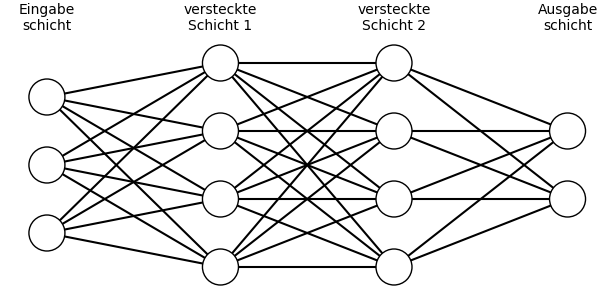

In [1]:
# Zeichne Netzwerk mit Code

from IPython.display import display, HTML
from io import BytesIO
import matplotlib.pyplot as plt
from src.erstelle_netzwerk import zeichne_netzwerk
from src.hilfsfunktionen import erstelle_bild

grosse = 6
y_ratio = 0.5
zeichne_netzwerk(grosse, y_ratio, [3, 4, 4, 2])

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()


html = erstelle_bild(bild, 500, "Neuronales Netzwerk")
display(HTML(html))

### Die Eingabeschicht (Input Layer)

Die Eingabeschicht empfängt die Daten von externen Quellen. Bei einem Zahlenerkennungsmodell beispielsweise würde die Eingabeschicht die Pixeldaten des Bildes repräsentieren. Dementsprechend würde ein 28x28-Bild 784 Eingabeneuronen benötigen. (vgl. Lheureux, o.J.)


### Die verborgenen Schichten (Hidden Layers)

Die verborgenen Schichten sind das, was neuronale Netzwerke so besonders macht. Sie verbinden die Eingabeschicht und die Ausgabeschicht miteinander. Je nach Schwierigkeitsgrad der Anwendung werden mehr und längere verborgene Schichten benötigt. Je mehr verborgene Neuronen es gibt, desto kompliziertere Berechnungen kann das neuronale Netzwerk durchführen. (ebd.)


### Ausgabeschicht (Output Layer)

Die Ausgabeschicht gibt die endgültigen Vorhersagen des neuronalen Netzwerkes zurück. In dem Zahlenerkennungsmodell wären das die Ziffern null bis neun, wobei jede Ausgabe die Wahrscheinlichkeit für eine der Ziffern darstellt. (ebd.)


## Forward Propagation

### Matrixmultiplikation

Bei der Forward Propagation werden die Eingabewerte des neuronalen Netzwerkes zur nächsten Schicht weitergegeben, bis sie zur Ausgabeschicht kommen und Vorhersagen (Predictions) erzeugen. (vgl. Anshumanm2fja, 2024)


Um das neuronale Netzwerk in der Programmierung umzusetzen, verwende ich die Programmiersprache Python in Kombination mit dem Paket "NumPy". Ein neuronales Netzwerk mit zwei Eingabeneuronen und einem Ausgabeneuron kann wie folgt dargestellt werden:


In [2]:
import numpy as np  # Import des Pakets NumPy

# Die Eingabewerte der Eingabeneuronen
inputs = np.array([[0.3], [0.6]])

# Die Gewichte zwischen den zwei Eingabeneuronen und dem Ausgabeneuron
weights = np.array([0.8, 0.2])
bias = 4  # Der Bias-Wert des Ausgabeneurons

# Berechnung des Ausgabewerts des Ausgabeneurons
output = inputs[0] * weights[0] + inputs[1] * weights[1] + bias
print(output)

[4.36]


In diesem Beispiel sind "inputs" die Eingabewerte der Eingabeneuronen und "weights" die Gewichtswerte zwischen den Eingabeneuronen und dem Ausgabeneuron. Der Bias-Wert des Ausgabeneurons wird als "bias" definiert.


Mathematisch kann die Liste an Eingabewerten als Spaltenvektor dargestellt werden:


$$
\def\xvector{\begin{bmatrix}
    x_1    \\
    x_1    \\
    \vdots \\
    x_{\ninputs}
\end{bmatrix}}
\\
\\
\x = \xvector
$$


Hierbei stellt $n_{inputs}$ die Anzahl der Eingabewerte dar und somit hat der Vektor die Dimension $(\dimension \ninputs 1)$. Der Bias-Wert ist ist hierbei ein Skalar und der Gewichtsvektor ein Zeilenvektor. Diese werden allerdings umgeschrieben.


Im Folgenden werden auch noch die Ausgaben eines neuronalen Netzwerkes mit zwei Eingabeneuronen und zwei Ausgabeneuronen programmatisch berechnet:


In [3]:
inputs = np.array([1.2, 3.2])

# Gewichte zwischen Eingabeneuronen und Ausgabeneuronen
weights1 = np.array([0.8, 1.3])  # Gewichte für das erste Ausgabeneuron
weights2 = np.array([3.1, 1.6])  # Gewichte für das zweite Ausgabeneuron

bias1 = 4  # Bias-Wert für das erste Ausgabeneuron
bias2 = 3  # Bias-Wert für das zweite Ausgabeneuron

# Der Ausgabewert des ersten Ausgabeneurons
output1 = inputs[0] * weights1[0] + inputs[1] * weights1[1] + bias1

# Der Ausgabewert des zweiten Ausgabeneurons
output2 = inputs[0] * weights2[0] + inputs[1] * weights2[1] + bias2

print(output1, output2)

9.120000000000001 11.84


Jedoch ist diese Schreibweise sehr mühsam und ineffizient, weshalb ich zur Berechnung der Ausgaben Vektoren und Matrizen zusammen in Kombination mit der Matrixmultiplikation verwende. Dazu stelle ich die Bias-Werte ebenso als Spaltenvektor und die Gewichte als Matrix dar:


$$
\def\bvektor{\begin{bmatrix}
    b_1    \\
    b_1    \\
    \vdots \\
    b_{\nneurons}
\end{bmatrix}}
\\
\\
\b = \bvektor
$$


$$
\def\Wmatrix{\begin{bmatrix}
    w_{1,1} & w_{1,2} & \cdots & w_{1\ninputs} \\
    w_{2,1} & w_{2,2} & \cdots & w_{2\ninputs} \\
    \vdots  & \vdots  & \ddots & \vdots         \\
    w_{\nneurons1} & w_{\nneurons2} & \cdots & w_{\nneurons\ninputs}
\end{bmatrix}}
\\
\\
\W = \Wmatrix
$$


$\nneurons$ beschreibt dabei die Anzahl der Neuronen. Der Bias-Vektor $\b$ und die Gewichtsmatrix $\W$ haben beide $\nneurons$ Zeilen. Da der Bias-Vektor nur eine Spalte besitzt, hat er die Dimension $(\dimension \nneurons 1)$. Die Gewichtsmatrix hingegen hat $\ninputs$ Spalten und damit die Dimension $(\dimension \nneurons \ninputs)$. Das Gewicht $w_{1,2}$ beschreibt die Verbindung zwischen dem ersten Neuron der aktuellen Schicht und dem zweiten Eingabewert.


Zur Berechnung der Ausgabewerte des neuronalen Netzwerks verwende ich die Matrixmultiplikation. Zur Veranschaulichung für diese Rechenoperation definiere ich die Matrizen $\A$ und $\B$:


$$
\def\Amatrix{\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3}
\end{bmatrix}}
\\
\\
\A = \Amatrix
$$


$$
\def\Bmatrix{\begin{bmatrix}
    b_{1,1} & b_{1,2} \\
    b_{2,1} & b_{2,2} \\
    b_{3,1} & b_{3,2} \\
\end{bmatrix}}
\\
\\
\B = \Bmatrix
$$


Hierbei hat die Matrix $\A$ die Dimension $(\dimension 2 3)$ und die Matrix $\B$ die Dimension $(\dimension 3 2)$.


Bei der Matrixmultiplikation muss die Spaltenanzahl der ersten Matrix mit der Zeilenanzahl der zweiten Matrix übereinstimmen. Das Ergebnis ist eine neue Matrix, deren Zeilenanzahl der der ersten Matrix und deren Spaltenanzahl der der zweiten Matrix entspricht. Die Berechnung erfolgt, indem die Zeilen der ersten Matrix mit den entsprechenden Spalten der zweiten Matrix multipliziert und die Produkte anschließend summiert werden (vgl. Jung, 2014). Dies lässt sich wie folgt darstellen:


$$
\def\boxedAmatrix{\begin{bmatrix}
              a_{1,1} \quad a_{1,2} \quad a_{1,3} \\
    \redboxed{a_{2,1} \quad a_{2,2} \quad a_{2,3}}
\end{bmatrix}}
\\
\def\boxedBmatrix{\begin{bmatrix}
    \redboxed{\begin{matrix}
        b_{1,1} \\
        b_{2,1} \\
        b_{3,1}
    \end{matrix}}
    &
    \begin{matrix}
        b_{1,2} \\
        b_{2,2} \\
        b_{3,2}
    \end{matrix}
\end{bmatrix}}
\\
\def\boxedABmatrix{\begin{bmatrix}
             {a_{1,1} b_{1,1} + a_{1,2} b_{2,1} + a_{1,3} b_{3,1}} & {a_{1,1} b_{1,2} + a_{1,2} b_{2,2} + a_{1,3} b_{3,2}}  \\
    \redboxed{a_{2,1} b_{1,1} + a_{2,2} b_{2,1} + a_{2,3} b_{3,1}} & {a_{2,1} b_{1,2} + a_{2,2} b_{2,2} + a_{2,3} b_{3,2}}
\end{bmatrix}}
\\
\\
\begin{array}{cc}
    \boxedAmatrix \times \boxedBmatrix = \\
    \boxedABmatrix
\end{array}
$$


Die resultierende Matrix hat die Dimension $(\dimension 2 2)$, da $\A$ zwei Zeilen und $\B$ zwei Spalten besitzt.


Der Vektor $\z$ kann mit Hilfe der Matrixmultiplikation und einer Addition folgendermaßen beschrieben werden:


$$\z = \W \x + \b$$


Die Zeilenanzahl von $\z$ entspricht der Zeilenanzahl von $\W$, während die Spaltenanzahl von $\z$ der Spaltenanzahl von $\x$ entspricht. Somit ist $\z$ ein Spaltenvektor mit der Dimension $(\dimension \nneurons 1)$.


In [4]:
inputs = np.array([[1.2], [3.2]])

# Gewichtsmatrix zwischen Eingabeneuronen und Ausgabeneuronen (4 x 2)
weights = np.array(
    [
        [0.8, 1.3],  # Gewichte des ersten Ausgabenneuron
        [3.1, 1.6],  # Gewichte des zweiten Ausgabenneuron
    ]
)

# Bias-Vektor für die Ausgabeneuronen (2 x 1)
bias = np.array([[4], [3]])

# Berechnung der Ausgabewerte durch Matrixmultiplikation
outputs = np.dot(weights, inputs) + bias  # Vektor von Ausgabewerten z (1 x 2)
print(outputs)

[[ 9.12]
 [11.84]]


Hierbei stellt "inputs" der Eingabevektor $\x$ und "weights" die Gewichtsmatrix $\W$ zwischen Eingabe- und Ausgabeneuronen dar. "bias ist der Bias-Vektor $\b$ der Ausgabeneuronen und "outputs" repräsentiert den Vektor der berechneten Ausgabewerte $\z$


### Batches

Bisher verarbeitet der Code jeweils nur ein Trainingsbeispiel pro Zyklus. Um die Effizienz zu steigern, werden jedoch mehrere Trainingsbeispiele gleichzeitig bearbeitet. Diese Menge an Beispielen wird als Batch bezeichnet. Durch die parallele Verarbeitung lassen sich Berechnungen effizienter durchführen. Daher wird das Training neuronaler Netzwerke in der Praxis meist auf GPUs durchgeführt, da diese über eine große Anzahl an Recheneinheiten verfügen.(vgl. Kinsley, 2020, TC: 8:00)

Eine weitere essenzielle Eigenschaft von Batches ist die Normalisierung: Wenn mehrere Beispiele gleichzeitig verarbeitet werden, können Schwankungen in den Ausgabewerten ausgeglichen werden. Dadurch wird das Lernen stabiler und konsistenter. (vgl. Kinsley, 2020, TC: 3:12)


Mathematisch lässt sich ein Batch von Trainingsbeispielen als eine Matrix $\X$ darstellen:


$$
\def\Xmatrix{\begin{bmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1 \nsamples} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2 \nsamples} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{\ninputs 1} & x_{\ninputs 2} & \cdots & x_{\ninputs \nsamples}
\end{bmatrix}}
\\
\mathbf{X} = \Xmatrix
$$


Dabei bezeichnet $\nsamples$ die Anzahl der Trainingsbeispiele im Batch. Die Matrix $\X$ hat somit die Dimension $(\dimension \ninputs \nsamples)$.


Die Matrixmultiplikation funktioniert weiterhin, solange die Spaltenanzahl der Gewichtsmatrix $\W$ mit der Zeilenanzahl der Eingabematrix $\X$ übereinstimmt. Das Ergebnis ist eine Ausgabematrix $\Z$ mit der Dimension $(\dimension \nneurons \nsamples)$.


Der zugehörige Code sieht nun folgendermaßen aus:


In [5]:
# Eingabematrix einer Batch mit 4 Trainingsbeispielen,
# wobei jedes Beispiel 2 Eingabewerte enthält (4 x 2)
inputs = np.array([[1.2, 3.2, 4.2, 3.1], [3.2, 1.2, 0.2, 2.2]])

# Berechnung der Ausgabewerte durch Matrixmultiplikation
outputs = np.dot(weights, inputs) + bias  # Matrix von Ausgabewerten (2 x 4)
print(outputs)

[[ 9.12  8.12  7.62  9.34]
 [11.84 14.84 16.34 16.13]]


Spätere Kapitel benötigen das Wissen um Matrizen zu transponieren.


### Die Layer-Klasse

Um weitere Schichten hinzuzufügen, kann der bereits vorhandene Code wiederverwendet werden. Um dies effizient umzusetzen, bietet es sich an, Klassen zu schreiben. Demnach erstelle ich die Klasse "Layer". Diese dient als Bauplan für alle Schichten, die instanziiert werden.


In [6]:
class Layer:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs: Anzahl an Eingabewerten (bzw. Neuronen der vorherigen Schicht).
        n_neurons: Anzahl an Neuronen für diese Schicht.
        """
        self.weights = 0.1 * np.random.randn(n_neurons, n_inputs)  # Gewichtsmatrix
        self.bias = 0.1 * np.random.randn(n_neurons, 1)  # Bias-Vektor

    def forward(self, inputs):
        """
        Berechnung des Ausgabewerts für die Neuronen in dieser Schicht basierend
        auf den Eingabewerte "inputs".
        """
        self.saved_inputs = inputs  # Eingabewerte für spätere Verwendung speichern
        outputs = np.dot(self.weights, inputs) + self.bias  # Ausgabewerte als Matrix
        return outputs  # Rückgabe der Ausgabewerte

Die Parameter "n_inputs" und n_neurons bestimmen die Struktur der Schicht: n_inputs gibt die Anzahl der Eingabewerte an, während n_neurons die Anzahl der Neuronen innerhalb der Schicht festlegt. Die Gewichtsmatrix "self.weights" hat die Dimension $(\dimension \nneurons \ninputs)$, während der Bias-Vektor die Dimension $(\dimension \nneurons)$ besitzt und die Eingabematrix "inputs" die Form $(\dimension \ninputs \nsamples)$ hat. Die "forward"-Methode berechnet die Matrix an Ausgabewerten "outputs" und besitzt die Dimension $(\dimension \nneurons \ninputs)$. Diese wird dann ausgegeben.


Zur Veranschaulichung erstelle ich ein neuronales Netzwerk mit insgesamt drei Schichten definiert: Eine Eingabeschicht mit zwei Neuronen, einer versteckten Schicht mit vier Neuronen und einer Ausgabeschicht mit fünf Neuronen:


In [7]:
# Eingabeschicht mit 2 Neuronen → verborgenen Schicht mit 4 Neuronen
hidden_layer = Layer(2, 4)

# Verborgenen Schicht mit 4 Neuronen → Ausgabeschicht mit 5 Neuronen
output_layer = Layer(4, 5)

# Ausgabewerte für die verborgene Schicht
hidden_layer_outputs = hidden_layer.forward(inputs)

# Ausgabewerte für die Ausgabeschicht
output_layer_outputs = output_layer.forward(hidden_layer_outputs)
print(output_layer_outputs)

print(output_layer_outputs.shape)

[[-0.16733657 -0.08665335 -0.04631174 -0.1245494 ]
 [-0.14335063 -0.0877873  -0.06000563 -0.13340574]
 [ 0.06894318  0.08011073  0.08569451  0.07571458]
 [-0.03742423  0.06254451  0.11252888  0.0528855 ]
 [-0.03801082 -0.01819492 -0.00828697 -0.03578034]]
(5, 4)


Die Eingabeschicht wird durch die Eingabematrix "inputs" mit der Dimension $(\dimension 2 4)$ dargestellt. Diese Werte dienen als Eingabe für die versteckte Schicht "hidden_layer", die vier Neuronen besitzt und daher eine Ausgabematrix "hidden_layer_outputs" mit der Dimension $(\dimension 4 4)$ bildet. Anschließend werden die Werte von der Ausgabeschicht "output_layer" weiterverarbeitet, die fünf Neuronen besitzt und somit eine finale Ausgabenmatrix "output_layer_outputs" mit der Dimension $(\dimension 5 4)$ erzeugt. Die Spalten dieser Matrix repräsentieren die Vorhersagen für die einzelnen Trainingsbeispiele und die Zeilen die Vorhersage eines bestimmten Ausgabeneurons.


## Regression vs Klassifizierung

Für die späteren Kapitel ist es wichtig zwischen Regressions- und Klassifizierungsproblemen zu unterscheiden. Regression ist eine Supervised Learning-Methode. Sie wird verwendet, um kontinuierliche numerische Werte vorherzusagen. Dabei wird eine Beziehung zwischen Eingangsvariablen und Ausgabewerten hergestellt. Typische Anwendungen umfassen zum Beispiel die Vorhersage von Verkaufszahlen, Temperaturen oder Immobilienpreisen. (vgl. Saxena, 2024)


Klassifizierung ist ebenfalls eine Supervised Learning-Methode, die darauf abzielt, Eingabedaten in diskrete Kategorien einzuteilen. Typische Anwendungen sind die Bilderkennung oder die Spam-Erkennung. (ebd.)


## Activation Functions

Ein neuronales Netzwerk ist im Wesentlichen eine Funktionsannäherung. Activation Functions ermöglichen es neuronalen Netzwerken, nicht-lineare Beziehungen zwischen Daten zu modellieren. Ein Neuron ohne Activation Function ist eine lineare Funktion. Besteht ein neuronales Netzwerk nur aus solchen Neuronen, dann kann dieses Netzwerk sich nur an lineare Funktionen annähern und besitzt somit nicht die Fähigkeit, komplexere Funktionen wie eine Sinusfunktion zu approximieren. (vgl. Kinsley, 2020, 7:47)



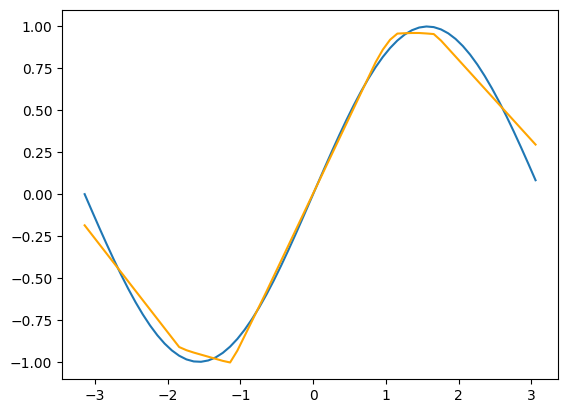

In [8]:
# Zeichne Sinus Funktionsannäherung mit Code

from matplotlib import animation
import matplotlib.pyplot as plt
from src import sin
import numpy as np
from io import BytesIO
from src.hilfsfunktionen import erstelle_bild
import math

sin_eingaben = np.arange(-math.pi, math.pi, 0.1)
sin_eingaben = sin_eingaben.reshape(len(sin_eingaben), 1)
ziele = np.sin(sin_eingaben)

netzwerk, _ = sin.trainiere_netzwerk(sin_eingaben, ziele)

vorhersagen = netzwerk.vorwaerts_durchlauf(sin_eingaben)
plt.plot(sin_eingaben, ziele, label="Wahre Funktion")
plt.plot(sin_eingaben, vorhersagen, label="Neuronales Netzwerk", color="orange")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches="tight")
bild.seek(0)
plt.close()

html = erstelle_bild(bild, 400, "Lineare Funktionsannäherung einer Sinuskurve")
display(HTML(html))

Um dieses Problem zu lösen, werden auf das Ergebnis der Neuronen Aktivierungsfunktionen angewendet. Es gibt verschiedene Arten von Aktivierungsfunktionen, zwei weit verbreitete und beliebte sind die Sigmoid Function und ReLU Function (Rectified Linear Unit). (vgl. Kinsley, 2020, TC: 7:52)


### Die Sigmoid Function

Die Sigmoid-Funktion ist eine mathematische Funktion, die den Wertebereich auf ein bestimmtes Intervall beschränkt und eine S-förmige Kurve bildet. Es gibt verschiedene Varianten der Sigmoid-Funktion, eine davon ist die logistische Sigmoid-Funktion. Diese Funktion beschränkt den Wertebereich auf das Intervall zwischen null und eins. Im Kontext des maschinellen Lernens wird die logistische Sigmoid-Funktion oft einfach als "Sigmoid-Funktion" bezeichnet (vgl. Topper, 2023).


Die Sigmoid-Funktion wird berechnet, indem man eins durch eins plus die Eulersche Zahl $e$ hoch dem negativen Wert dividiert (Kerremans, 2022). Mathematisch lässt sich die Funktion wie folgt darstellen:


$$a_{ji} = \sigma(z_{ji}) = \frac{1}{1 +e^{-z_{ji}}}$$


Dabei steht $a_{ji}$ für den aktivierten Ausgabewert des $i$-ten Neuron und des $j$-ten Neuron und $z_{ji}$ für den jeweiligen rohen Ausgabewert. Diese Operation wird hier elementweise für jedes Element in der Matrix $\Z$ gemacht. Um die Sigmoid Function an Schichten von Neuronen anzuwenden, erstelle ich die Klasse "Sigmoid".


In [9]:
class Sigmoid:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        activated_outputs = 1 / (1 + np.exp(-raw_outputs))
        self.saved_activated_outputs = (
            activated_outputs  # Aktivierte Ausgaben für spätere Verwendung speichern
        )
        return activated_outputs

Ähnlich wie bei der Layer-Klasse enthält die Sigmoid-Klasse eine Methode namens "forward". Diese berechnet die Matrix aus aktivierten Ausgabewerten "activated_outputs" anhand der rohen Ausgabewerten "raw_outputs". Diese Matrix wird für spätere Verwendung gespeichert und anschließend ausgegeben.


Als Beispiel berechne ich die aktivierten Ausgaben eines neuronalen Netzwerks mit einer Eingabeschicht von zwei Neuronen und einer Ausgabeschicht von vier Neuronen:


In [10]:
output_layer = Layer(2, 4)
activation_function = Sigmoid()

raw_outputs = output_layer.forward(inputs)
activated_outputs = activation_function.forward(raw_outputs)
print(activated_outputs)

[[0.44728974 0.37055451 0.33426794 0.38103919]
 [0.59003362 0.49372942 0.44530039 0.53065472]
 [0.59423661 0.4973387  0.44850286 0.53322271]
 [0.52465395 0.55194847 0.56548953 0.55055005]]


In diesem Beispiel wird die Methode "forward" der Klasse "Sigmoid" verwendet, um die aktivierten Ausgabewerte "activated_outputs" aus den rohen Ausgabewerten "raw_outputs" der Ausgabeschicht zu berechnen.


### Die ReLU Function

Eine weitere Activation Function ist die ReLU Function. Der Vorteil der ReLU Function gegenüber anderen Activation Functions ist ihre Effizienz.
Ihre Funktionsweise ist einfach: Ist ein Wert positiv, wird der Wert beibehalten, ansonsten wird der Wert gleich 0 gesetzt. (vgl. Kinsley, 2020, TC: 9:00) Die Formel dafür ist:


$$a_{ji} = \relu(z_{ji}) = max(0,z_{ji})$$


Auch dafür erstelle ich eine Klasse:


In [11]:
class ReLU:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        self.saved_raw_outputs = raw_outputs
        activated_outputs = np.maximum(0, raw_outputs)
        return activated_outputs

In diesem Codeblock werden die rohen Ausgaben "raw_outputs" mit der Funktion "np.maximum" in aktivierte Ausgaben "activated_outputs" umgewandelt.


### Die Softmax Function

Die Softmax Function ist eine weitere Aktivierungsfunktion, die aber in der Ausgabeschicht bei Klassifizierungsproblemen durchgeführt wird. Sie transformiert die Rohwerte in Wahrscheinlichkeiten, die zusammen 1 ergeben. Dies ermöglicht es, die Ausgaben des neuronalen Netzwerkes als Wahrscheinlichkeiten für die möglichen Kategorien zu interpretieren. (vgl. Belagatti, 2024)


Die Softmax Function exponiert die Ausgaben mit Hilfe der exponentiellen Funktion $e^y$. Anschließend werden diese Werte normalisiert in dem sie durch die Summe aller exponierte Werte dividiert werden. (ebd.) Die mathematische Formel sieht dann so aus:


$$a_{ji} = \softmax(z_{ji}) = \frac {e^{z_{ji}}} {\sum_{k=1}^{\noutputs} {e^{z_{ki}}}}$$


Wobei $\noutputs$ für die Anzahl an Ausgabeneuronen steht.


So wie bei der der Sigmoid Function und der ReLU Function erstelle ich auch für die Softmax Function eine Klasse:


In [12]:
class Softmax:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        # Exponierte Werte
        exponentiated_values = np.exp(raw_outputs - np.max(raw_outputs, axis=0))
        # Summe der exponierten Werte
        sum_values = np.sum(exponentiated_values, axis=0, keepdims=True)
        # Normalisierte / aktivierte Ausgaben
        normalized_outputs = exponentiated_values / sum_values
        return normalized_outputs

In diesem Abschnicht werden zuerst die exponierte Werte "exponentiated_values" mit "np.exp" berechnet. Anschließend werden diese Werte normalisiert, in dem sie durch die Summe der exponierten Werte "sum_values" dividiert werden und somit die aktivierten Ausgaben "normalized_outputs" bilden.


## Die Netzwerk-Klasse

Um die verschiedenen Komponenten des neuronalen Netzwerkes, wie die Schichten und Aktivierungsfunktionen, effizient zu verwalten, erstelle ich die Klasse "Netzwork". Diese Klasse besteht aus einer Liste von Schichten "self.layers" und einer Liste von Aktivierungsfunktionen "self.activation_functions". Zusätzlich enthält sie die Methode "forward_propagation". Diese Methode basiert auf den Eingabewerten "inputs" der Eingabeschicht und führt eine Forward Propagation durch. Dabei werden schichtweise die rohen Ausgaben jeder Schicht berechnet und dann mit der entsprechenden Aktivierungsfunktion aktiviert. Die endgültigen Ergebnisse in der letzten Schicht sind die Vorhersagen "predictions" des neuronalen Netzwerkes und werden zurückgegeben. Mit der Methode "add_layer" können Schichten und deren entsprechenden Aktivierungsfunktionen zum Netzwerk hinzugefügt werden.


In [13]:
class Network:
    def __init__(
        self,
    ):
        self.layers = []
        self.activation_functions = []

    def add_layer(self, layer, activation_function):
        """
        Fügt eine instanzierte Schicht "layer" mit ihrer entsprechenden Aktivierungsfunktion
        "activation_function" zum Netzwerk hinzu.
        """
        self.layers.append(layer)
        self.activation_functions.append(activation_function)

    def forward_propagation(self, inputs):
        """
        Berechnet die Vorhersagen "predictions" des Netzwerkes anhand der Eingabewerte
        "inputs" der Eingabeschicht.
        """
        current_inputs = inputs
        for layer, activation_function in zip(self.layers, self.activation_functions):
            raw_outputs = layer.forward(current_inputs)
            activated_outputs = activation_function.forward(raw_outputs)
            # Aktivierte Ausgaben der Schicht werden als Eingabewerte für die nächste Schicht verwendet
            current_inputs = activated_outputs
        predictions = current_inputs
        return predictions

Als Beispiel erstelle ich ein Netzwerk, das aus 2 Eingabeneuron, 4 versteckte Neuronen und 5 Ausgabeneuronen besteht:


In [14]:
network = Network()
network.add_layer(
    Layer(2, 4),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(4, 5),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

network.forward_propagation(inputs)

array([[0.20591745, 0.21058127, 0.210904  , 0.21122711],
       [0.18427027, 0.18679562, 0.18765576, 0.18520215],
       [0.18565347, 0.19224318, 0.19214877, 0.18774723],
       [0.18764863, 0.18328018, 0.18293429, 0.18482218],
       [0.23651017, 0.22709976, 0.22635719, 0.23100134]])

## Das Zahlungserkennungsmodell

Um ein neuronales Netzwerk zu trainieren, werden Daten benötigt. Für ein Modell, das zu der Erkennung von Zahlen dient, eignet sich die MNIST-Datenbank. MNIST enthält 60.000 Trainingsbilder und 10.000 Testbilder von handgeschriebenen Ziffern und kann somit zum Trainieren als auch für die Evaluierung verwendet werden. (vgl. Khan, 2024)


Für mein neuronales Netzwerk verwende ich für die Eingabeschicht 784 Neuronen, da die MNIST Bilder aus 28 mal 28 Pixels bestehen. Ich habe eine verborgene Schicht mit
20 Neuronen mit der ReLU-Aktivierungsfunktion. Die Ausgabeschicht besteht aus zehn Neuronen, die jeweils die Ziffern null bis neun repräsentieren. Da es sich hier um ein Klassifizierungsproblem handelt, verwende ich für die Ausgabeschicht die Softmax-Funktion.


In [15]:
# Lade Tranings und Test Daten

from data.load_data import load_test_data

import gzip
import numpy as np
import pickle


def load_images(file):
    with gzip.open(file, "r") as f:
        f.read(4)  # Überspringen des Headers (Magic Number)
        n_images = int.from_bytes(f.read(4), "big")
        f.read(8)  # Überspringen des Headers (Anzahl Reihen und Zeilen)

        # Lesen der Bilddaten
        # Pixelwerte sind von 0 bis 255 als unsigned Byte gespeichert
        image_data = f.read()
        images = (
            np.frombuffer(image_data, dtype=np.uint8).reshape(n_images, 784).T
        )
        images = (
            images.reshape(images.shape[0], -1).astype(np.float32) - 127.5
        ) / 127.5  # Zwischen -1 und 1
        return images


def load_labels(file):
    with gzip.open(file, "r") as f:
        f.read(8)  # Überspringen des Headers (Magic Number und Anzahl der Labels)
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        labels = np.eye(10)[labels].T # Von Ziffern zu "Wahrscheinlichkeiten"
        return labels


def load_trainings_data():
    images = load_images("data/train-images-idx3-ubyte.gz")
    labes = load_labels("data/train-labels-idx1-ubyte.gz")
    return images, labes


def load_test_data():
    images = load_images("data/t10k-images-idx3-ubyte.gz")
    labes = load_labels("data/t10k-labels-idx1-ubyte.gz")
    return images, labes

In [16]:
network = Network()
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)   

def test_neural_network(network):
    # Bilder (Eingabewerte) und labels (tatsächliche Zielwerte als Wahrscheinlichkeiten)
    images, labels = load_test_data()

    # Vorhersagen als Wahrscheinlichkeitsverteilung
    predictions = network.forward_propagation(images)

    N = predictions.shape[1] # Anzahl an Trainingsbeispielen
    
    # Vorhersagen als Ziffern
    predicted_numbers = np.argmax(predictions, axis=0)

    # tatsächliche Zielwerte als Ziffern
    actual_values = np.argmax(labels, axis=0)

    # Vektor aus "Richtig Falsch" Werten
    comparisons = predicted_numbers == actual_values

    # Summe / Anzahl an richtigen Aussagen
    n_correct_predictions = sum(comparisons)
    
    # Genauigkeit des neuronalen Netzwerkes
    accuracy = n_correct_predictions / N
    
    print(accuracy)


test_neural_network(network)

0.0902


Zuerst werden die Bilder "images" und deren Beschriftungen "labels" geladen. Anschließend berechnet das neuronale Netzwerk Vorhersagen "predictions" basierend auf den Bilddaten und gibt diese als Wahrscheinlichkeitsverteilung zurück. Die Ziffer mit der höchsten Wahrscheinlichkeit wird dann mit der tatsächlichen Ziffer je Trainingsbesipiel verglichen. Um die Genauigkeit zu bestimmen, werden die richtigen Aussagen mit der gesamten Anzahl an Testbildern dividiert. Da das Netzwerk noch nicht trainiert wurde, ist die Genauigkeit sehr niedrig.


# Trainieren eines neuronalen Netzwerkes

## Deep- und Shallow Learning

Deep Learning und Shallow Learning sind Teilbereiche des Machine Learning und befassen sich mit dem Trainieren neuronaler Netzwerke. Shallow Learning wird verwendet, um flache (shallow) neuronale Netzwerke zu trainieren, die in der Regel aus zwei oder drei Schichten bestehen. Deep Learning hingegen wird bei tiefen (deep) neuronalen Netzwerken angewendet, um Netzwerke mit mehr als zwei versteckten Schichten zu trainieren. (vgl. Lodhi, o.J.)


Flache neuronale Netzwerke sind aufgrund ihrer vereinfachten Architektur schneller und einfacher zu trainieren. Allerdings eignen sie sich daher weniger gut für komplexe Probleme. Tiefe Netzwerke hingegen können durch ihre komplexe Struktur anspruchsvolle Probleme lösen, erfordern jedoch zusätzliche Methoden um Problemen wie Überanpassung zu vermeiden. (ebd.)


Bei dem im vorherigen Kapitel angesprochenen Zahlungserkennungsmodell handelt es sich um ein flaches neuronales Netzwerk, da es nur eine versteckte Schicht besitzt.


## Die Loss Function und die Cost Function

Die Begriffe Loss Function (Verlustfunktion) und Cost Function (Kostenfunktion) werden häufig synonym verwendet, haben jedoch grundlegend unterschiedliche Bedeutungen. Die Loss Function bewertet die Leistung einer einzelnen Vorhersage. Sie berechnet den Fehler des Netzwerks für ein einzelnes Trainingsbeispiel, indem sie die Vorhersage mit dem tatsächlichen Zielwert vergleicht. (vgl. Alake, o.J.)


Im Gegensatz dazu ist die Cost Function der Mittelwert der Loss Function über das gesamte Trainingsset. Sie bewertet die Gesamtleistung des neuronalen Netzwerks und spielt eine zentrale Rolle im Trainingsprozess. Das Ziel des Netzwerks ist es, die Kosten zu minimieren, um die Genauigkeit der Vorhersagen zu maximieren. (ebd.)


Es gibt verschiedene Arten von Cost Function, die je nach Aufgabestellung in zwei Kategorien eingeteilt werden können: Cost Functions für Regressionsprobleme und Cost Functions für Klassifikationsprobleme. (ebd.)


### Cost Functions für Regressionsprobleme

Typische Cost Functions für Regressionsprobleme sind der Mean Absolute Error (MAE) und der Mean Squared Error (MSE). Der Mean Absolute Error berechnet den Mittelwert der absoluten Differenzen zwischen den Vorhersagen und den tatsächlichen Zielwerten. (vgl. Alake, o.J.) Mathematisch wird sie so dargestellt:


$$MAE = {\frac {1} N} \sum_{i=1}^N \sum_{j=1}^{\noutputs} |\prediction_{ji} - y_{ji}|$$


Hierbei steht $N$ für die Anzahl an Trainingsbeispiel, $\prediction_{ji}$ steht für die Vorhersage, also die aktivierten Ausgabe $a_{ji}$ des Neurons $j$ in der Ausgabe Schicht für das $i$-te Trainingsbeispiel, und $y_ji$ für den tatsächliche Zielwert für diesen Ausgabewert und diesen Trainingsbeispiels.


Der Mean Squared Error hingegen berechnet die quadratischen Differenzen zwischen den Vorhersagen und den tatsächlichen Zielwerten. Durch das Quadrieren werden größere Differenzen stärker bestraft, was den MSE empfindlicher gegenüber Ausreißern macht. (ebd.):


$$MSE = {\frac {1} N} \sum_{i=1}^N \sum_{j=1}^{\noutputs} (\prediction_{ji} - y_{ji})^2$$


In [17]:
class MeanSquaredError:
    def calculate_cost(predictions, targets):
        losses = np.sum(np.square(predictions - targets), axis=0)
        cost = np.mean(losses)
        return cost

Für mein Programm werde ich nur den Mean Squared Error verwenden. Zuerst werden die Verluste "losses" berechnet, indem ich die Vorhersagen "predictions" von den Zielen "targets" subtrahiere und dann die Ergebnisse mit "np.square" quadriere. Da es mehrere Ausgabewerte pro Beispiel gibt, wird für jedes Beispiel der Verlust über alle Ausgabewerte summiert. Danach berechne ich die Kosten "cost" indem ich den Mittelwert aller Verluste bilde und diesen ausgebe.


### Cost Functions für Klassifizierungsprobleme

Eine typische Cost Function für Klassifizierungsprobleme ist der Categorical Cross Entropy (CCE). Um den Verlust $L$ eines einzelnen Trainingsbeispiel $i$ zu erhalten, wird die negative Summe aller tatsächlichen Zielwerte $y_{ji}$ multipliziert mit den jeweiligen logerierten Vorhersagen $\prediction_{ji}$ berechnet (vgl. Gómez Bruballa, 2018):


$$L_i = -{\sum_{j=1}^{\noutputs} y_{ji} \log(\prediction_{ji}})$$


Um die Kosten für alle Trainingsbeispiele zu berechnen wird der mittelwert aller Verluste wie bei den anderen Cost-Funktionen berechnet.


$$CCE {\frac {1} N} {\sum_{i=1}^N {L_{i}}}$$


In [18]:
class CategoricalCrossEntropy:
    def calculate_cost(predictions, targets):
        predictions = np.clip(predictions, 1e-7, 1 - 1e-7)
        losses = -np.sum(targets * np.log(predictions), axis=0)
        cost = np.mean(losses)
        return cost

Für mein Zahlungserkennungsmodell werde ich des Weiteren den Categorical Cross Entropy verwenden. Zuerst begrenze ich die Vorhersagen, damit die Werte nicht zu nah an null oder eins sind, um beim Logarithmieren Verzerrungen der Ergebnisse zu vermeiden. Danach berechne ich die Verluste "losses" in dem ich mit "np.log" die Vorhersagen "predictions" logarithmiere und dann mit den Zielen "targets" multipliziere. Die Ergebnisse werden über alle Klassen mit "np.sum" summiert. Um die Kosten "cost" zu berechnen verwende ich wieder "np.mean" um den Mittellwert aller Losses zu berechnen.


## Die Objective Function

Die Objective Function (Zielfunktion) ist eine Funktion, die im Optimierungsprozess entweder minimiert oder maximiert wird. Die Rolle der Objective Function variiert je nach Bereich des Machine Learning. Im Reinforcement Learning zielt die Objective Function darauf ab, die kumulative Belohnung eines Agenten über eine Reihe von Aktionen zu maximieren. (vgl. Muns, o.J.)


Im Deep Learning ist das Ziel der Objective Function, die Cost Function zu minimieren, indem die trainierbaren Parameter des neuralen Netzwerkes - also die Gewichte und Bias-Werte - angepasst werden. (vgl. Dey, 2019)


Dieses Kapitel konzentriert sich auf die Objective Function im Kontext des Deep Learning, wobei die Objective Function in diesem Fall auch als die Cost Function bezeichnet werden kann.


Die Formel einer Cost Function kann wie folgt dargestellt werden:


$$J(\theta) = {\frac 1 N} \sum_{i=1}^N {L(y_i, f(x_i, \theta))}$$


Dabei steht $x_i$ für die Eingabewerte des $i$-ten Trainingsbeispiels und $L$ für die Loss Function, die den Verlust zwischen dem tatsächlichen Zielwert $y_i$ und der Vorhersage $f(x_i, \theta)$ eines neuronalen Netzwerks mit den Parametern $\theta$ angibt.


## Gradient Descent

Gradient Descent ist ein Optimisation Algorithm. Er wird verwendet, um lokale Minimumstellen einer Funktion iterativ zu approximieren. Im Bereich des Machine Learning wird der Gradient Descent verwendet, um die Parameter eines neuronalen Netzwerks iterativ so anzupassen, dass die Cost Function minimiert wird. Der Algorithmus lässt sich wie ein Ball auf einer Landschaft mit Hügeln und Tälern darstellen, der schrittweise das Tal (das Minima) hinunterrollt, um den optimalen Punkt zu finden (vgl. Singh, 2025).



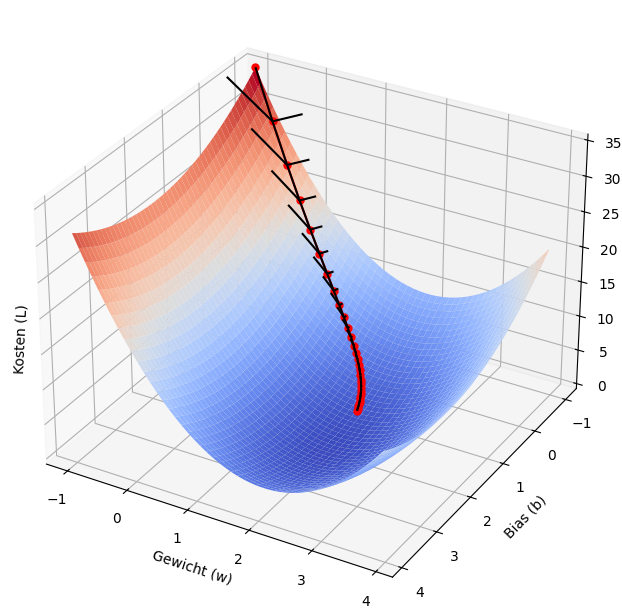

In [19]:
# Zeichne Cost-Landschaft mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler


def f(x):
    return 2 * x + 2


eingaben = np.arange(-3, 3, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht_bias(gewichte, bias):
    vorhersagen = gewichte * eingaben + bias
    verlust = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
    return verlust


def berechne_gradient(gewicht, bias):
    vorhersagen = gewicht * eingaben + bias
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    gradient_bias = np.sum(verlust_gradient)
    return [gradient_gewicht, gradient_bias]


def zeichne_landschaft():
    gewichtsbereich = np.arange(-1, 4, 0.1)
    biasbereich = np.arange(-1, 4, 0.1)
    gewichte, bias = np.meshgrid(gewichtsbereich, biasbereich)
    verluste = np.array(
        [
            [
                berechne_kostenfunktion_auf_gewicht_bias(gewicht, bias_wert)
                for gewicht in gewichtsbereich
            ]
            for bias_wert in biasbereich
        ]
    )

    ax.plot_surface(
        gewichte,
        bias,
        verluste,
        cmap="coolwarm",
    )  # Kostenlandschaft


def berechne_hinunterrollen():
    geschichte = []
    gewicht = -1  # Start Gewicht
    bias = -1  # Start Bias
    for _ in range(30):
        vorhersagen = gewicht * eingaben + bias
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)

        geschichte.append((gewicht, bias, kosten))

        gradient = berechne_gradient(gewicht, bias)
        gewicht -= 0.02 * gradient[0]
        bias -= 0.02 * gradient[1]

    return geschichte


def zeichne_hinunterrollen(punkte):
    gewichte = [p[0] for p in punkte]
    bias = [p[1] for p in punkte]
    kosten = [p[2] for p in punkte]
    ax.plot(
        gewichte,
        bias,
        kosten,
        color="red",
        marker="o",
        markersize=5,
        label="Descent Path",
    )
    for i in range(len(punkte) - 1):
        gewicht, bias, kosten = punkte[i]
        dgewicht = punkte[i + 1][0] - gewicht
        dbias = punkte[i + 1][1] - bias
        dkosten = punkte[i + 1][2] - kosten
        ax.quiver(
            gewicht,
            bias,
            kosten,
            dgewicht,
            dbias,
            dkosten,
            arrow_length_ratio=0.5,
            color="black",
        )


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d", computed_zorder=False)
# ax = fig.add_axes((-0.15, 0.05, 1, 1),projection="3d", computed_zorder=False)

zeichne_landschaft()
geschichte = berechne_hinunterrollen()
zeichne_hinunterrollen(geschichte)

# Achsentitel
ax.set_xlabel("Gewicht (w)")
ax.set_ylabel("Bias (b)")
ax.invert_yaxis()
ax.set_zlabel("Kosten (L)", labelpad=-260)

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches="tight", pad_inches=0)
bild.seek(0)
plt.close()

html = erstelle_bild(bild, 400, "Cost-Landschaft in Bezug auf Gewichte und Bias")
display(HTML(html))

Der Algorithmus berechnet zunächst den Gradienten. Der Gradient gibt an, in welcher Richtung und mit welcher Stärke die Funktion am stärksten ansteigt. Um also die Cost Function zu minimieren, werden die Parameter in Richtung des negativen Gradienten angepasst. Dazu werden die partiellen Ableitungen der Cost Function nach den Gewichten und Bias-Werten berechnet. (ebd.)


Die Cost-Funktion misst den Fehler zwischen den Vorhersagen des Modells und den tatsächlichen Zielwerten. Da die Gewichte und Bias-Werte die Vorhersagen beeinflussen, haben sie demnach einen Einfluss auf die Cost Function. Allerdings tragen einige Parameter stärker zur Veränderung der Cost Function bei als andere. Deshalb werden die Parameter proportional zu ihrer Änderungsrate angepasst. Die Partielle Ableitung zeigt an, wie empfindlich die Cost-Funktion auf Änderungen eines bestimmten Parameters reagiert. Gewichte, die eine große Änderung der Cost Function bewirken, werden entsprechend stärker angepasst, um den Fehler zu verringern, während Gewichte mit geringerem Einfluss nur minimal verändert werden. (ebd.)


Ein weiterer wichtiger Bestandsteil von Gradient Descent ist die Lernrate (Learning Rate). Die Lernrate ist ein Hyperparameter, der die Schrittgröße in jeder Iteration des Gradient Descent Algorithmus bestimmt. Es ist entscheidend, eine geeignete Lernrate auszuwählen, um den Trainingsprozess effizient zu gestalten. Ist die Lernrate zu niedrig, verläuft der Lernprozess sehr langsam und benötigt viele Iterationen Eine zu hohe Lernrate hingegen kann dazu führen, dass der Algorithmus das Minimum überschreitet und nicht zu einer optimalen Lösung führt (vgl. Pabasara, 2024)



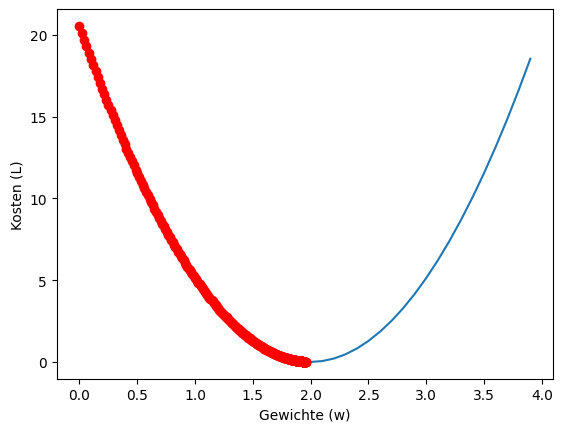
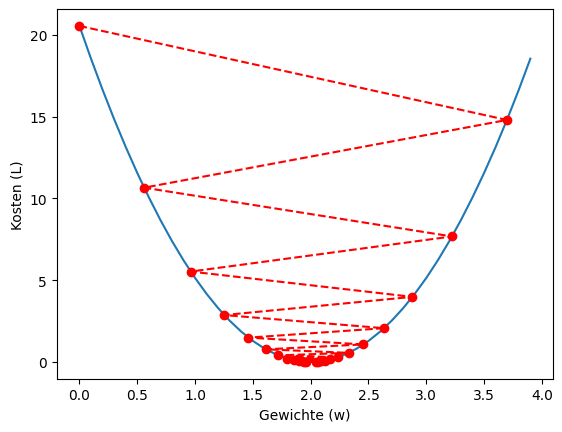
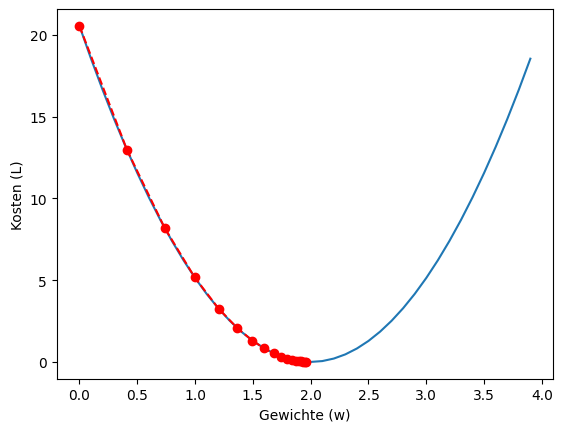

In [20]:
# Zeichne Gradient Descent mit verschiedenen Lernrate mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler


def f(x):
    return 2 * x


inputs = np.arange(0, 4, 0.1)
targets = f(inputs)


def calculate_cost_weight_graph(weights):
    cost_weight_graph = []
    for weight in weights:
        predictions = weight * inputs
        cost = MittlererQuadratischerFehler.kosten(predictions, targets)
        cost_weight_graph.append(cost)
    return cost_weight_graph


def calculate_gradient(weight):
    predictions = weight * inputs
    gradient_cost = MittlererQuadratischerFehler.rueckwaerts(predictions, targets)
    gradient_weight = np.dot(inputs.T, gradient_cost)
    return gradient_weight


def draw_gradient_descent(learning_rate):
    weights_history = []
    cost_history = []
    weight = 0  # Start Gewicht
    cost = 5
    while cost > 0.01:
        weights_history.append(weight)
        predictions = weight * inputs
        cost = MittlererQuadratischerFehler.kosten(predictions, targets)
        cost_history.append(cost)

        gradient_weight = calculate_gradient(weight)
        weight -= learning_rate * gradient_weight

    plt.scatter(weights_history, cost_history, color="red", zorder=2)
    plt.plot(weights_history, cost_history, color="red", linestyle="--")


gewichte = np.arange(0, 4, 0.1)
cost_weight_graph = calculate_cost_weight_graph(gewichte)


def display_gradient_descent(learning_rate, label):
    plt.xlabel("Gewichte (w)")
    plt.ylabel("Kosten (L)")
    plt.plot(inputs, cost_weight_graph)
    draw_gradient_descent(learning_rate)

    bild = BytesIO()
    plt.savefig(bild, format="png", bbox_inches="tight")
    bild.seek(0)
    plt.close()
    picture = erstelle_bild(bild, 500, label)
    return picture


picture1 = display_gradient_descent(
    0.001, "Gradientenabstieg mit zu niedriger Lernrate"
)
picture2 = display_gradient_descent(0.18, "Gradientenabstieg mit zu hoher Lernrate")
picture3 = display_gradient_descent(0.02, "Gradientenabstieg mit optimaler Lernrate")

html = f"""
    <div style="display:grid; grid-template-columns: repeat(3, 1fr);">
        {picture1}
        {picture2}
        {picture3}
    </div>
"""
display(HTML(html))

Nachdem der Gradient berechnet wurde, erfolgt die iterative Anpassung der trainierbaren Parameter des neuronalen Netzwerks. Dies geschieht, indem die Parameter um den Gradienten, multipliziert mit der Lernrate, verringert werden (vgl. Singh, 2025). Die Formel lässt sich wie folgt darstellen:


$$\theta := \theta - \eta \nabla J(\theta)$$


Dabei steht $\theta$ für die Parameter des neuronalen Netzwerks, $\eta$ für die Lernrate und $\nabla J(\theta)$ für den Gradienten der Cost-Funktion in Bezug auf alle trainierbaren Parameter $\theta$. Um die Gewichtsmatrix $\W$ und den Bias-Vektor $\b$ einer bestimmten Schicht zu aktualisieren, kann demnach folgende Formel verwendet werden:


$$\W^l := \W^l - \eta \nabla_{\W^l} J$$


$$\b^l := \b^l - \eta \nabla_{\b^l} J(\b^l)$$


$l$ gibt an um welche Schicht es sich handelt. $\W^l$ ist demnach die Gewichtsmatrix der Schicht $l$ Weiterhin gibt $\nabla_{\W^l} J$ den Gradienten in Bezug zu der Gewichtsmatrix $\W^l$. Um Gradient Descent mit Python zu implementieren, erstelle ich die Klasse "GD":


In [21]:
class GD:
    def __init__(self, network, learning_rate):
        """
        network: Das Netzwerk, das optimiert werden soll
        learning_rate: Die Lernrate, die die Schrittgröße bestimmt
        """
        self.network = network
        self.learning_rate = learning_rate

    def update_parameters(self):
        """
        Aktualisiert die Parameter (Gewichte und Bias-Werte) aller Schichten im Netzwerk basierend auf den Gradienten
        """
        # Iteriert über alle Schichten des Netzwerks und aktualisiert deren Parameter
        for layer in self.network.layers:
            # Aktualisiert die Gewichte der aktuellen Schicht mit dem negativen Gradienten
            # multipliziert mit der Lernrate, um den Schritt zu skalieren
            layer.weights -= self.learning_rate * layer.gradient_weights
            # Aktualisiert die Bias-Werte der aktuellen Schicht mit dem negativen Gradienten
            # multipliziert mit der Lernrate, um den Schritt zu skalieren
            layer.bias -= self.learning_rate * layer.gradient_bias

Im Konstruktor der Klasse speichere ich das neuronale Netzwerk „network“ und die Lernrate „learning_rate“. Momentan enthält die Klasse nur die Methode „update_parameters“. Diese Methode verwende ich, um die trainierbaren Parameter – also die Gewichte „layer.weights“ und die Bias-Werte „layer.bias“ – jeder Schicht im Netzwerk basierend auf den negativen Gradienten und der Lernrate zu aktualisieren. Der genaue Trainingsprozess und die Berechnung der Gradienten werden in den folgenden Kapiteln erklärt.


## Backpropagation

### Grundlagen

Backpropagation ist ein wichtiger Bestandteil im maschinellen Lernen und wird zusammen mit Optimisation Algorithms wie Gradient Descent verwendet, um die Gewichte und Bias-Werte eines neuronalen Netzwerkes anzupassen und somit die Cost Function zu minimieren. Backpropagation nutzt Ableitungsregeln wie die Kettenregel, um den Gradienten der Cost Function effizient in Bezug auf alle Gewichte und Bias-Werte zu berechnen. (vgl. Kostadinov, 2019)


Der Algorithmus kann in drei Schritte unterteilt werden: Der erste Teil wird als "Forward Pass" oder "Forward Propagation" bezeichnet und berechnet eine Vorhersage basierend auf gegebene Eingabedaten. Im zweiten Schritt werden mit Cost Functions die Vorhersagen mit den tatsächlichen Zielwerten verglichen und evaluiert. Der letzte Schritt ist der "Backwards Pass" und hier werden die berechneten Fehler bei der Evaluierung im Netzwerk schichtweise zurück propagiert. Dabei wird berechnet, wie sehr eine Schicht und ein Gewicht oder Bias-Wert zum Fehler beitragen. (ebd.)


### Grundidee

Angenommen, man betrachten ein stark vereinfachtes neuronales Netzwerk mit jeweils nur einem Neuron pro Schicht. In diesem Fall besitzt jedes Neuron lediglich ein Gewicht und einen Bias-Wert. Die Verbindungen zwischen den Gewichten und Bias-Werten zur Cost Function lassen sich wie folgt darstellen:



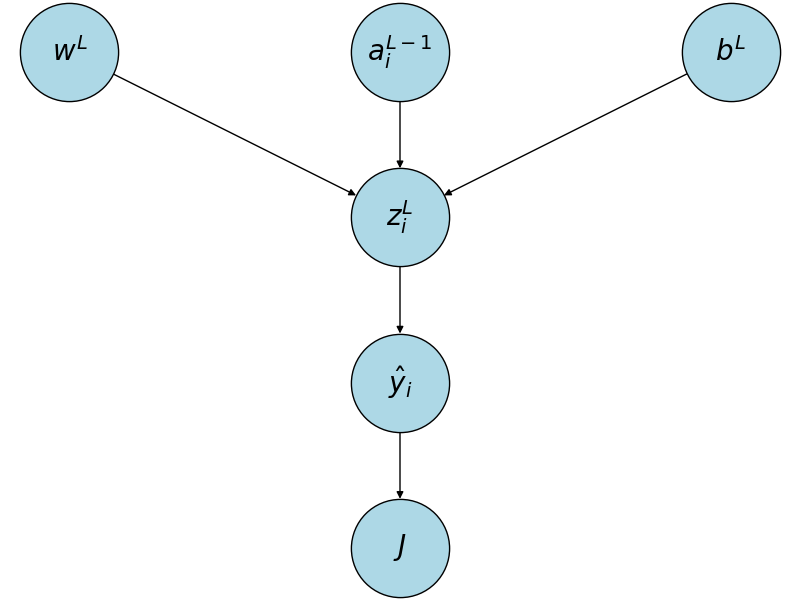

In [22]:
# Zeichne ein neuronales Netzwerk Graphen Diagramm mit Code

import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
positions = {
    "$w^L$": (0, 3),
    "$a_i^{L-1}$": (1, 3),
    "$b^L$": (2, 3),
    "$z_i^L$": (1, 2),
    "$\\hat{y}_i$": (1, 1),
    "$J$": (1, 0),
}

# Add edges (arrows) between nodes
edges = [
    ("$w^L$", "$z_i^L$"),
    ("$b^L$", "$z_i^L$"),
    ("$a_i^{L-1}$", "$z_i^L$"),
    ("$z_i^L$", "$\\hat{y}_i$"),
    ("$\\hat{y}_i$", "$J$"),
]

# Add nodes and edges to the graph
G.add_nodes_from(positions.keys())
G.add_edges_from(edges)

# Plot the graph using networkx
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos=positions,
    with_labels=True,
    node_size=5000,
    node_color="lightblue",
    font_size=20,
    font_weight="bold",
    arrows=True,
    edgecolors="black",
)

# Display the plot
plt.axis("off")


bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

html = erstelle_bild(bild, 300, "Neuronales Netzwerk Diagram")
display(HTML(html))

Hierbei steht $w$ für das Gewicht, $b$ für den Bias-Wert, $z$ für die rohe Ausgabe und $a$ für die aktivierte Ausgabe. $J$ repräsentiert die Cost Function, während $L$ die Anzahl an Schichten beschreiben. Somit bedeutet $z_i^L$ der rohe Ausgabenwerte $z_i$ der Ausgabechicht. $\prediction_i$ gibt die Vorhersage des neuronalen Netzwerkes an und $i$, um welhes Trainingsbeispiel es sich handelt.


In der gegebenen Darstellung beeinflusst das Gewicht $w^L$ die rohe Ausgabe $z_i^L$, die durch die Aktivierungsfunktion transformiert wird, um die Vorhersage Ausgabe $a_i^L$ zu erzeugen. Diese aktivierte Ausgabe $a_i^L$ stellt die Vorhersage $y_i$ des neuronalen Netzwerks dar und hat somit Einfluss auf die Cost Function $J$. Um den Gradienten der Cost Function in Bezug auf die Gewichte und Bias-Werte zu berechnen, werde ich die Formeln rückwärts unter der Verwendung der Kettenregel propagieren. Zuerst gebe ich allerdings die partielle Ableitung der Cost Function auf die Vorhersage:


$${\frac {\partial J} {\partial z_i^L}} = {\frac {\partial J} {\partial \prediction_i}}$$


Hiermit kann partiell auf die aktivierten Ausgaben abgeleitet werden:


$${\frac {\partial J} {\partial z_i^L}} = {\frac {\partial J} {\partial z_i^L}} {\frac {\partial \prediction_i} {\partial z_i^L}}$$


Ein neuronales Netzwerk besitzt allerdings in der Regel mehrere Neuronen pro Schicht. Daher sieht die partielle Ableitung der Cost Function in Bezug auf die rohe Ausgabe $z$ eines bestimmten Neurons in der Ausgabechicht $L$ stattdessen so aus:


$${\frac {\partial J} {\partial z_{ji}^L}} = {\frac {\partial J} {\partial \prediction_{ji}}} {\frac {\partial \prediction_{ji}} {\partial z_{ji}^L}}$$


Hierbei bezeichnet $j$ ein beliebiges Neuron innerhalb der Schicht $l$, in dem der Fall Ausgabeschicht $L$.


Die rohe Ausgabe wird durch die Gewichte, aktivierten Ausgaben und dem Bias-Wert bestimmt. Mit den folgenden Formeln kann dieser Einfluss bestimmt angegeben werden:


$${\frac {\partial J} {\partial w_{jk}^L}} = \sum_{i=1}^N {\frac {\partial z_{ji}^L} {\partial w_{jk}^L}} {\frac {\partial J} {\partial z_{ji}^L}}$$

$${\frac {\partial J} {\partial b_j^L}} = \sum_{i=1}^N {\frac {\partial z_{ji}^L} {\partial b_j^L}} {\frac {\partial J} {\partial z_{ji}^L}}$$

$${\frac {\partial J} {\partial a_{ki}^{L-1}}} = \sum_{j=1}^{\nneurons^L} {\frac {\partial z_{ji}^L} {\partial a_{ki}^{L-1}}} {\frac {\partial J} {\partial z_{ji}^L}}$$


Dabei steht $\nneurons^L$ für die Anzahl an Neuronen in der Ausgabeschicht $L$ und , und $k$ ein Neuron in der Schicht $l-1$.


Die Gewichte und Bias-Werte beeinflussen die rohen Ausgabe aller Trainingsbeispiele $i$, dem nach werden diese auf $i$ summiert. Die aktivierte Ausgabe $a_{ki}^{L-1}$ hat nur Einfluss auf ein Trainingsbeispiel, beinflusst allerdings alle Neuronen $j$, da es mit allen verbunden ist. Demnach wird auf $j$ summiert.


Nun fehlt noch die aktivierte Ausgabe partiell auf die rohe Ausgabe abzuleiten. Das kann so dargestellt werden:


$${\frac {\partial J} {\partial z_{ki}^{L-1}}} = {\frac {\partial a_{ki}^{L-1}} {\partial z_{ki}^{L-1}}} {\frac {\partial J} {\partial a_{ki}^{L-1}}}$$


Und somit kann wieder auf die Gewichte und Bias-Werte der Schicht $L-1$ und den aktivierten Ausgaben der Schicht $L-2$ abgeleitet werden. Man propagiert sich rückwärts und berechnet die partiellen Ableitungen der Werte bis man die Gewichte und Bias-Werte der ersten Schicht abgeleitet hat.


### Berechnung der Formeln für die Gradienten

Nun ist es wichtig, die exakten Formeln für die partiellen Ableitungen zu bestimmen, um den Gradienten der Gewichte und Bias-Werte zu berechnen. Angenommen, man besitzt die partielle Ableitung der Cost Function in Bezug auf die rohen Ausgabewerte $z_{ji}^l$ der Schicht $l$


$${\frac {\partial J} {\partial z_{ji}^l}}$$


Die Änderung der Cost Function in Bezug auf die rohen Ausgabewerte $z_{ji}^l$ kann auch durch das Symbol $\delta_{ji}^l$ dargestellt werden. Dieser wird auch als "Error Signal" bezeichnet und gibt den Fehler eines Neurons $j$ in der Schicht $l$ an. (vgl. Stansbury, 2020) Ich werde jedoch weiterhin die Notation ${\frac {\partial J} {\partial z_{ji}^l}}$ verwenden, um eine einheitliche Schreibweise beizubehalten und klarzustellen, dass es sich um die partielle Ableitung der Cost Function in Bezug auf die rohen Ausgabewerte handelt.


#### Gradient der Gewichte, der Bias-Werte und der aktivierten Ausgaben

Die Berechnung der rohen Ausgabewerte kann ähnlich wie im Kapitel "3.1 Grundlagen" beschrieben werden:


$$z_{ji}^l = \sum_{k=1}^{\ninputs^l} {w_{jk}^L a_{ki}^{l-1} + b_j^l}$$


Dabei ist der Eingabewert $a_k^{l-1}$ eine aktivierte Ausgabe des $k$-ten Neuron von der vorherigen Schicht $l-1$. $\ninputs^l$ steht hierbei für die Anzahl an Eingabewerten in der Schicht $l$ und somit auch für die Anzahl an Neuronen in der Schicht $l-1$.


Basierend auf dieser Formel können die partiellen Ableitungen der Cost Function bezüglich der Gewichte, Bias-Werte und aktivierten Ausgaben bestimmt werden:


$${\frac {\partial J} {\partial w_{jk}^l}} = \sum_{i=1}^{\nsamples} {\frac {\partial J} {\partial z_{ji}^l}} a_{ki}^{l-1}$$


$${\frac {\partial J} {\partial b_j^l}} = \sum_{i=1}^{\nsamples} {\frac {\partial J} {\partial z_{ji}^l}} 1$$


$${\frac {\partial J} {\partial a_{ji}^{l-1}}} = \sum_{j=1}^{\nneurons^L} {\frac {\partial J} {\partial z_{ji}^l}} w_{jk}^l$$


Wie oben erklärt haben die Gewichte, die Bias-Werte und die aktivierten Ausgaben Einfluss auf entweder mehrere Trainingsbeispiele oder Neuronen und werden dementsprechend summiert. Die Änderungsrate des Gewichts ist abhängig von der aktivierten Ausgabe, deshalb wird bei der ersten Formel mit $a_{ki}^{l-1}$ multipliziert. Das selbe gilt umgekehrt für die dritte Formel mit $w_{jk}^l$. Die Änderung des Bias-Wert auf die rohe Ausgabe ist allerdings eins.


Bisher habe ich mich allerdings nur mit den partiellen Ableitung auf bestimmte Parameter befasst. Der Gradient besteht aus mehreren dieser Parameter. Um einen Gradient für die Matrizen zu bilden können folgende Formeln stattdessen verwendet werden, hierbei verwenden die erste und dritte Formeln die Matrixmultiplikation:


$$\nabla_{\W^l} J = (\nabla_{\Z^l} J) (\A^{l-1})^T$$


$\W$ besitz die Form $(\dimension \nneurons \ninputs)$ während $\nabla_{\Z^l} J$ die Dimension $(\dimension \nneurons \nsamples)$ und $\A^{l-1}$ die Dimension $(\dimension \ninputs \nsamples)$ besitz. Um die Matrixmultiplikation durchzuführen transponiere ich deshalb $\A^{l-1}$ und erhalte eine Matrix $(\A^{l-1})^T$ mit der Dimension $(\dimension \nsamples \ninputs)$.


$$\nabla_{\A^{l-1}} J = (\W^l)^T (\nabla_{\Z^l} J)$$


Auch hier muss wieder transponiert werden um die Matrixmultiplikation durchzuführen. Die Matrix $\W^l$ wird dabei transponiert zur Matrix $(\W^l)^T$ mit der Dimension $(\dimension \ninputs \nneurons)$


Letzendlich fehlt noch die Formel für den Gradienten der Cost-Function im Bezug zum Bias-Vektor $\b$:


$$(\nabla_{\b^l} J)_j = \sum_{i=1}^{\nsamples} (\nabla_{\Z^l} J)_{ji}$$


Hierbei werden die Spalten der Matrix $\nabla_{\Z^l} J$ mit der Form $(\dimension \nneurons \nsamples)$ summiert, wodurch ein Zeilenvektor mit der Dimension $(\dimension \nneurons 1)$ entsteht.


Basierend auf diesen Formeln erweitere ich die Klasse "Layer" um die Methode "backwards":


In [23]:
class Layer(Layer):
    def backwards(self, gradient_raw_outputs):
        """
        Berechnet den Gradienten der Cost Function in Bezug zu den
        Gewichten und Bias-Werten der aktuellen Schicht und aktivierten Ausgaben
        der vorherigen Schicht.

        gradient_raw_outputs: Gradient der Cost Function in Bezug zu den rohen Ausgaben
        der aktuellen Schicht (dJ/dZ).
        """

        # Gradient der Cost Function in Bezug zu den Gewichten von der aktuellen Schicht (dJ/dW).
        self.gradient_weights = np.dot(gradient_raw_outputs, self.saved_inputs.T)

        # Gradient in Bezug zu den Bias-Werten (dJ/db).
        self.gradient_bias = np.sum(gradient_raw_outputs, axis=1, keepdims=True)

        # Gradient in Bezug zu den aktivierten Ausgaben der vorherigen Schicht (dJ/dA).
        gradient_activated_outputs = np.dot(self.weights.T, gradient_raw_outputs)
        return gradient_activated_outputs

Die Methode "backwards" verwendet den Parameter "gradient_raw_outputs", der den Fehler $\delta^l$ bzw. den Gradienten der Cost Function in Bezug auf die rohen Ausgaben $\Z^l$ darstellt. Dieser Gradient wird genutzt, um die Gradienten der Cost Function in Bezug auf die Gewichte, Bias-Werte und aktivierten Ausgaben zu berechnen wie in den Formeln beschrieben zu berechnen. Der Gradient in Bezug auf die aktivierten Ausgaben gebe ich für die Berechnung im kommenden Abschnitt aus.


#### Gradien der aktivierten Ausgaben

Nun werde ich die partiellen Ableitungen der Cost Function in Bezug auf die rohen Ausgaben erklären. Als Beispiel verwende ich hierbei die Sigmoid Activation Function und die ReLU Activation Function. Wie im Kapitel "3.4.1 Die Sigmoid Function" und "3.4.2 ReLU Function" bereits erklärt, sehen diese Formeln dafür so aus:


$$a_{ji}^l = \sigma(z_{ji}^l) = \frac{1}{1 +e^{-z_{ji}^l}}$$


$$a_{ji}^l = \relu(z_{ji}^l) = max(0,z_{ji}^l)$$


Die Ableitung der Sigmoid Function kann mithilfe von Geogebra auf folgende Formel abgeleitet werden:


$${\frac {d {a_{ji}}^l} {d z_{ji}^l}} = \sigma(z_{ji}^l) (1 - \sigma(z_{ji}^l))$$


Bei der ReLU Function werden rohen Ausgaben zu null wenn sie negativ sind und bleiben unverändert wenn sie positiv sind. Die Änderungsrate ist also null, wenn die Eingabe negativ ist, und eins, wenn sie positiv ist. Das kann mit folgender Formel dargestellt werden:


$$
{\frac {d a_{ji}^l} {d z_{ji}^l}} = {\frac {d max(z_{ji}^l,0)} {d z_{ji}^l}} =
\begin{cases}
1 & \text{if } z_{ji}^l \gt 0 \\
0 & \text{otherwise}
\end{cases}
= (z_{ji} \gt 0)
$$


Nachdem die Ableitung der aktivierten Ausgaben auf die rohen Ausgaben bestimmt wurde, kann man mit Hilfe der partiellen Ableitung der Cost Function auf die aktivierten Ausgaben den Gradienten der Cost Function auf die rohen Ausgaben berechnet werden. Die Berechnung dafür stelle ich mit folgenden Formeln dar:


$$\nabla_{\Z^l} J = (\nabla_{\A^l} J) \odot \A^l \odot (1 - \A^l)$$


$$\nabla_{\Z^l} J = (\nabla_{\A^l} J) \odot (\Z^l \gt 0)$$


Hierbei steht $\odot$ für die Rechenoperation "Hadamard Product". Diese ist ähnlich wie die Matrixaddition, mit dem Unterschied das Elemente einer bestimmten Spalte und einer bestimmte Reihe elementweise multipliziert und nicht addiert werden. (vgl. Pal, 2019) Zur veranschaulichung wird das mit einem Beispiel illustriert:


$$
\def\Aamatrix{\begin{bmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2} \\
    a_{3,1} & a_{3,2}
\end{bmatrix}}
\\
\def\Abmatrix{\begin{bmatrix}
    b_{1,1} & b_{1,2} \\
    b_{2,1} & b_{2,2} \\
    b_{3,1} & b_{3,2}
\end{bmatrix}}
\\
\def\Acmatrix{\begin{bmatrix}
    a_{1,1} {b_{1,1}} & a_{1,2} {b_{1,2}} \\
    a_{2,1} {b_{2,1}} & a_{2,2} {b_{2,2}} \\
    a_{3,1} {b_{3,1}} & a_{3,2} {b_{3,2}}
\end{bmatrix}}
\\
\Aamatrix \odot \Abmatrix = \Acmatrix
$$


Basierend auf den Code erweitere ich die Klasse "Sigmoid" und die Klasse "ReLU" beide mit der Methode "backwards":


In [24]:
class Sigmoid(Sigmoid):
    def backwards(self, gradient_activated_outputs):
        """
        Berechnet den Gradienten der Cost Function in Bezug zu
        den rohen Ausgaben der aktuellen Schicht (dJ/dZ)

        gradient_activated_outputs: Gradient der Cost Function in Bezug zu den aktivierten Ausgaben
        der aktuellen Schicht (dJ/dA)
        """
        # Gradient in Bezug zu (A*(A-1))
        d_activated_d_raw = self.saved_activated_outputs * (
            1 - self.saved_activated_outputs
        )

        gradient_raw_outputs = gradient_activated_outputs * d_activated_d_raw
        return gradient_raw_outputs


class ReLU(ReLU):
    def backwards(self, gradient_activated_outputs):
        """
        Berechnet den Gradienten der Cost Function in Bezug zu
        den rohen Ausgaben der aktuellen Schicht (dJ/dZ).

        gradient_activated_outputs: Gradient der Cost Function in Bezug zu den aktivierten Ausgaben
        der aktuellen Schicht (dJ/dA).
        """
        # Gradient der Cost Function in Bezug zu den rohen Ausgaben (dJ/dZ).
        gradient_raw_outputs = gradient_activated_outputs * (self.saved_raw_outputs > 0)
        return gradient_raw_outputs

#### Gradien der Vorhersagen

Als nächstes ist bestimme ich den Gradienten der Cost Function in Bezug zu den Vorhersagen $\Prediction$. Dabei steht $\Prediction$ gleichzeitig für die Matrix der aktivierten Ausgaben $\A$ der letzten Schicht $L$. Vorerst verwende ich den Mean Squared Error als Cost Function. Die Formel dafür ist wie im Kapitel "3.4.1 Cost Functions für Regressionsprobleme" beschrieben:


$$MSE = {\frac {1} N} \sum_{i=1}^N \sum_{j=1}^{\noutputs} (\prediction_{ji} - y_{ji})^2$$


Die partielle Ableitung dieser Cost Function in Bezug zu eine einzelne Vorhersage $\prediction_{ji}$ kann durch folgende Rechenoperationen beschrieben werden:


$${\frac {\partial J} {\partial \prediction_{ji}}} = {\frac {1} N} \sum_{i=1}^N \sum_{j=1}^{\noutputs} 2(\prediction_{ji} - y_{ji}) = {\frac {2} N} (\prediction_{ji} - y_{ji})$$


Da es sich um den vorhergesagten Wert $\prediction_{ji}$ eines einzelnen Neurons $j$ für das Trainingsbeispiel $i$ handelt, fallen beiden Summenoperatoren weg. Um nun den Gradienten des Mean Squared Error in Bezug auf alle Vorhersagen $\Prediction$ zu berechnen, kann folgende Formel verwendet werden:


$${\nabla_\Prediction J} = {\frac 2 N} (\Prediction - \Y)$$


Hierbei beschreibt $\Prediction$ die Matrix der Vorhersagen und $\Y$ die Matrix der tatsächlichen Zielwerten. Beide Matrizen besitzen die Dimension $(\dimension \noutputs N)$. Die resultierende Gradientmatrix ${\nabla_{\hat{\mathbf{Y}}} J}$ besitz ebenfalls die gleiche Dimension.


Um die Berechnung umzuseten, erweitere hierbei ich die Klasse "MeanSquaredError" ebenso um die Methode "backwards":


In [25]:
class MeanSquaredError(MeanSquaredError):
    def backwards(predictions, targets):
        """
        Berechnet den Gradienten des Mean Squared Error in Bezug zu den Vorhersagen.
        """
        N = predictions.shape[1]  # Anzahl an Trainingsbeispielen
        gradient_predictions = (2 / N) * (predictions - targets) / len(predictions)
        return gradient_predictions

#### Categorical Cross Entropy + Softmax

Anschließend fehlt noch die Ableitungen für den Categorical Cross Entropy und für die Softmax Activcation Function. Die partielle Ableitung des Categorical Cross Entropy auf die rohe Ausgabe $z_{ji}$ kann mithilfe der Kettenregel folgendermaßen dargestellt werden:


$${\frac {\partial J} {\partial z_{ji}}} = {\frac {\partial \prediction_{ji}} {\partial z_{ji}}} {\frac {\partial J} {\partial \prediction_{ji}}}$$


Anstatt die partiellen Ableitungen einzeln auszurechnen, können diese allerdings kombiniert werden um die Berechnungen effizienter zu machen. Die partielle Ableitung der Loss Function $L$ für das Trainingsbeispiel $i$ in Bezug zu dem rohen Ausgabewert $z_{ji}^l$ wird berechnet, in dem der vorhergesagte Wert $\prediction_{ij}$ mit dem jeweiligen tatsächlichen Zielwert $y_{ij}$ subtrahiert wird. (vgl. ) Mathematisch kann dies folgendermaßen dargestellt werden:


$${\frac {\partial L_i} {\partial z_{ji}^l}} = {\prediction_{ji} - y_{ji}}$$


Hierbei handelt es sich allerdings um die partielle Ableitung der Loss Function $L_i$ für ein beliebiges Trainingsbeispiel $i$. Die partielle Ableitung der Cost Function $J$ für den gesamten Trainingsset auf die rohen Ausgaben sieht hierbei stattdessen so aus:


$${\frac {\partial J} {\partial z_{ij}}} = {\frac 1 N} \sum_{i=1}^N \prediction_{ij} - y_{ij} = \prediction_{ij} - y_{ij}$$


Ähnlich wie bei der Ableitung des Mean Squared Error fällt hier der Summenoperator weg. Die Berechnung des Gradienten $\Z$ in Bezug zu der Cost Function kann man demnach so darstellen:


$${\nabla_\Z J} = {\frac 1 N} (\Prediction - \Y)$$


Anders als bei dem Categorical Cross Entropy handelt es sich hierbei nicht um den Gradienten im Bezug auf $\A$ sondern um den Gradienten im Bezug auf $\Z$


Die Formeln setze ich nun mit Python um in dem ich wie zuvor die Klassen "CategoricalCrossEntropy" und "Softmax" mit der Methode "backwards" erweitere:


In [26]:
class CategoricalCrossEntropy(CategoricalCrossEntropy):
    def backwards(predictions, targets):
        """
        Berechnet den Gradienten des Categorical Cross Entropy in
        Bezug zu den rohen Ausgaben der Ausgabenschicht (dJ/dZ).
        """
        N = predictions.shape[1]  # Anzahl an Trainingsbeispielen
        gradient_raw_outputs = (predictions - targets) / N
        return gradient_raw_outputs


class Softmax(Softmax):
    def backwards(self, gradient_raw_outputs):
        # Gibt die Gradienten direkt weiter (Softmax wird in Kombination
        # mit Categorical Cross Entropy verwendet).
        return gradient_raw_outputs

"CategoricalCrossEntropy.backwards" berechnet hierbei den Gradienten in Bezug zu den rohen Ausgaben "gradient_raw_outputs" und gibt diesen wieder. Da diese Berechnung mit Softmax kombiniert wurde, gibt "Softmax.backwards" diesen Gradienten ohne Modifizierung direkt aus.


### Die Backpropagation-Methode


Um die Backpropagation durchzuführen, erstelle ich für die Klasse "Netzwerk" eine neue Methode namens "backpropagation".


In [27]:
class Network(Network):
    def __init__(self, cost_function):
        self.layers = []
        self.activation_functions = []
        self.cost_function = cost_function

    def backpropagation(self, predictions, targets):
        # Gradient der Cost Function in Bezug zu den Vorhersagen (dJ/dY).
        # Beim Categorical Cross Entropy + Softmax sind diese allerdings im Bezug zu
        # den rohen Ausgaben der Ausgabenschicht (dJ/dZ).
        gradient_predictions = self.cost_function.backwards(predictions, targets)
        # Der Gradient der Vorhersagen ist identisch mit dem Gradient der aktivierten
        # Ausgaben der Ausgabenschicht
        gradient_activated_outputs = gradient_predictions
        # Rückwärts berechnet, von Ausgabeschicht zu Eingabeschicht.
        for layer, activation_function in zip(
            reversed(self.layers), reversed(self.activation_functions)
        ):
            # Gradient der Cost Function in Bezug zu den aktivierten Ausgaben
            # der aktuellen Schicht(dJ/dA).
            gradient_raw_outputs = activation_function.backwards(
                gradient_activated_outputs
            )

            # Gradienten der Cost Function in Bezug zu den Gewichten (dJ/dW)
            # und den Bias-Werten der aktuellen Schicht (dJ/db).
            # Berechnet zusätzlich den Gradienten der Cost Function in Bezug zu den rohen Ausgaben
            # der vorherigen Schicht(dJ/dZ).
            gradient_activated_outputs = layer.backwards(gradient_raw_outputs)

Diese Methode berechnet zuerst den Gradienten der Vorhersagen, oder rohen Ausgabewerte der letzten Schicht im Falle von Categorical Cross Entropy, "gradient_activated_outputs" und berechnet dann schichtweise rückwärts den Gradient der rohen Ausgaben mit "aktivierung.backwards(gradient)" und den Gradient der Gewichte, Bias-Werte und aktivierten Ausgaben mit "schicht.rueckwaerts(gradient)". Nachdem die Gradienten berechnet wurden, kann die Gewicht- und Bias-Werte-Aktualisierung durchgeführt werden, wie beschrieben in Kapitel "2.3 Gradientenabstieg"


## Stochastic Gradient Descent

Es gibt verschiedene Varianten von Gradient Descent. Diese haben ihre Vor- und Nachteile. Die bisher besproche Variante ist auch als "Batch Gradient Descent" oder "Vanilla Gradient Descent" und berechnet den Gradient im Bezug des gesamten Trainingssets. (vgl. )

Das ist allerdings sehr ineffizient. Eine Alternative um dieses Problem zu lösen ist unter dem Namen "Stochastig Gradient Descent" (SGD) bekannt. Anstelle den Gradienten für das gesamte Trainingsset zu berechnen, wird hierbei stattdessen der Gradient für ein einzelnes Trainingsbeispiel oder für ein Batch von Trainingsbeispielen berechnet. Dadurch wird zwar Zufälligkeit eingeführt und es werden mehr Iterationen wie bei Gradient Descent benötigt, allerdings dauert es wesentlich kürzer diese Durchzuführen. (vgl. )

Es gibt zwar verschiedene Gradient Descent Varianten, allerdings entscheide ich mich trotzdem für Stochastic Gradient Descent, da es vielversprechende Resultade für mein Zahlungserkennungsmodell liefert. Um SGD zu implementieren, erstelle ich eine Klasse namens "SGD", die von der Gradient Descent Klasse "GD" erweitert wird:

In [28]:
class SGD(GD):
    def create_batches(self, inputs, targets, batch_size):
        N = inputs.shape[1]  # Anzahl an Trainingsdaten
        # Trainingsset in mini Batches eingeteilt
        batches = []
        for i in range(0, N, batch_size):
            batch_inputs = inputs[:, i : i + batch_size]
            batch_targets = targets[:, i : i + batch_size]
            single_batch = (batch_inputs, batch_targets)
            batches.append(single_batch)
        return batches
    
    def optimise(
        self,
        inputs,
        targets,
    ):
        # Vorwärtsdurchlauf: Berechnung der Vorhersagen
        predictions = self.network.forward_propagation(inputs)

        cost = self.network.cost_function.calculate_cost(predictions, targets)

        # Rückwärtsdurchlauf: Berechnung der Gradienten
        self.network.backpropagation(predictions, targets)

        # Aktualisiert die Gewichte und Bias-Werte basierend auf die Gradienten
        self.update_parameters()
        return cost

    def train(self, inputs, targets, batch_size):
        batches = self.create_batches(inputs, targets, batch_size)
        cost_history = []
        avg_epoch_cost = 1
        while avg_epoch_cost > 0.2:
            epoch_cost_history = []
            for batch_inputs, batch_targets in batches:
                cost = self.optimise(batch_inputs, batch_targets)
                self.optimise(batch_inputs, batch_targets)
    
                epoch_cost_history.append(cost)
                cost_history.append(cost)
            avg_epoch_cost = np.mean(epoch_cost_history)
    
        return cost_history

Die Methode "create_batches" teilt den Trainingsset in Batches ein, die jeweils eine Batchgröße von "batch_size" besitzen.  In der Methode "optimise" wird zuerst die Forward Propagation durchgeführt und anschließend die Backpropagation, um die Gradienten für die Gewichte und Bias-Werte zu berechnen. Danach werden die Gewichte und Bias-Werte mit den Gradienten durch die Methode "update_parameters" aktualisiert. Dies stellt eine einzelne Iteration dar. In der Methode "train" wird diese Aktualisierung für jede Batch durchgeführt. Eine Epoche ist erfolgreich durchgeführt wenn der Prozess für alle Batches durchgeführt wurde. Der Trainingsprozess erstreckt sich für so viele Epochen, bis die mittleren Kosten eine gewisste Grenze, in dem Fall 0.2, unterschritten haben.

## Trainieren eines Zahlungserkennungsmodell

Mit Hilfe der Techniken die in diesem Kapitel besprochen wurden, kann ich das Zahlungserkennungsmodell nun trainieren. Der Code dafür ist so:

In [29]:
# Categorical Cross Entropy als Cost Function
network = Network(CategoricalCrossEntropy)
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

training_images, training_labels = load_trainings_data()

sgd = SGD(network, learning_rate=0.1)
cost_history = sgd.train(
            training_images,
            training_labels,
            batch_size=64,
        )

test_neural_network(network)

0.9232


Da es sich um ein Klassifizierungsproblem handelt, verwende ich den Categorical Cross Entropy als meine Cost Function. Der Aufbau für das Netzwerk ist identisch mit dem besprochenen im Kapitel "3.6 Das Zahlungserkennungsmodell". Nachdem ich das Netzwerk instanziert habe, lade ich die Trainingsdaten "training_images" mit den entsprechenden Zahlenbeschriftungen "training_labels" der MNIST Bibliothek. Anschließend wird das Netzwerk mit einer Lernrate von 0.1 und einer Batchgröße von 64 trainiert. Das Netzwerk kann anschließend durch die Methode "test_neural_network" mit den Testdaten getestet werden. Die Leistung des Netzwerks pro Iteration sieht vereinfachert so aus:


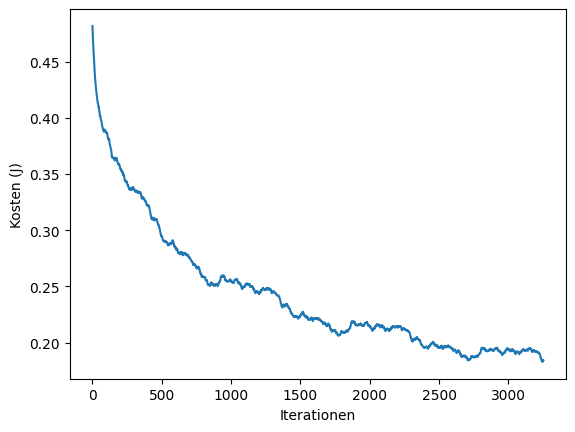

In [61]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

def create_cost_picture(cost_history):
    plt.xlabel("Iterationen")
    plt.ylabel("Kosten (J)")
    plt.plot(moving_average(cost_history, 500))

    bild = BytesIO()
    plt.savefig(bild, format="png", bbox_inches="tight")
    bild.seek(0)
    plt.close()
    picture = erstelle_bild(bild, 300, "Kosten Graphen des Zahlungserkennungsmodell mit Stochastic Gradient Descent")
    return picture

html = create_cost_picture(cost_history)
display(HTML(html))

# Genetische Algorithmen

## Grundlagen

Genetische Algorithmen sind eine Art von Optimierungsalgorithmen, die mit dem Prozess der Evolution vergleichbar sind. Genetische Algorithmen werden verwendet, um mithilfe von biologischen Prozessen wie Reproduktion und natürliche Selektion Lösungen zu Problemen zu finden. (vgl. Kanade, o.J.)


Genetische Algorithmen eignen sich hervorragend für Probleme, bei denen aus einer großen Anzahl von Möglichkeiten Lösungen gefunden werden müssen. Außerdem können sie für die Lösung von kombinatorischen Problemen, bei denen eine optimale Anordnung von Elementen in einer begrenzten Liste gesucht wird, verwendet werden. (ebd.)


Eine einfache Anwendung für genetische Algorithmen ist das „Knapsack“-Problem. Bei diesem Problem ist ein Rucksack gegeben, in den man Gegenstände hineinlegen kann, die jeweils ein Gewicht und einen Geldwert besitzen. Ziel ist, dass der Rucksack eine möglichst hohe Summe an Geldwerten enthält, die nicht die Gewichtgrenze überschreitet. (vgl. Bhayani, o.J.)


Um die Funktionsweise von genetischen Algorithmen zu illustrieren, verwende ich die Programmiersprache Python, um das „Knapsack“-Problem zu lösen.


## Population

Ein wichtiger Bestandteil von genetischen Algorithmen ist das Konzept einer Population, die eine Kollektion von Individuen darstellt. Ein Individuum repräsentiert dabei eine mögliche Lösung zu einem Problem. (vgl. Kanade, o.J.)


In [32]:
class Item:
    def __init__(self, name, mass, value):
        self.name = name
        self.mass = mass
        self.value = value


item_list = [
    # Handy mit 3kg Masse und einem Geldwert von 5€
    Item("Handy", mass=3, value=5),
    Item("Laptop", 6, 10),
    Item("Diamant", 1, 30),
    Item("Brot", 1, 1),
]


class Individual:
    def __init__(self, item_bits):
        self.item_bits = item_bits

    def print_items_in_backpack(self):
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                print(
                    f"Gegenstand: {item.name}, Masse: {item.mass}kg, Geldwert: {item.value}€"
                )


individual = Individual([0, 1, 0, 1])

individual.print_items_in_backpack()

Gegenstand: Laptop, Masse: 6kg, Geldwert: 10€
Gegenstand: Brot, Masse: 1kg, Geldwert: 1€


Die Repräsentation eines Individuums stelle ich mit einer Liste von binären Zahlen dar. Ist die Zahl 0, dann ist der Gegenstand nicht im Rucksack. Ist die Zahl 1, dann ist er schon im Rucksack. Die Position des Gegenstandes sagt aus, um was für einen Gegenstand es sich handelt.


Zur Modellierung eines eines Individuums erstelle ich die Klasse "Individual", deren Attribut "item_bits" diese Liste speichert. Die verfügbaren Gegenstände werden durch die Klasse "Item" erstellt. Jedes Objekt dieser Klasse beinhaltet einen Namen, eine Masse und einen Geldwert. Die Liste "item_list" enthält alle verfügbaren Gegenstände. Der erste Gegenstand in dieser Liste ist zum Beispiel ein Handy mit einer Masse von 3kg und einem Wert von €5.


Als Beispiel verwende ich das Individuum [0, 1, 0, 1]. Das bedeutet, dasss der Rucksack den Laptop und das Brot enthält. Das wird durch die Methode "print_items_in_backpack" veranschaulicht.


Der Genetische Algorithmus startet mit einer initialen Population. Diese Population wird zufällig generiert und bildet durch Operatoren wie Selektion, Crossover und Mutation die Population in der nächsten Generation. Dieser Vorgang wird iterativ durchgeführt, um dann zu einer optimalen sowie effektiven Lösung zu kommen. Diese Operatoren spiegeln Prozesse wie natürliche Selektion, Reproduktion und genetische Variation in der Natur wider. (vgl. Kanade, o.J.)


In [33]:
import random


class Individual(Individual):

    def create_random_individual():

        random_item_bits = []

        for _ in item_list:  # für jedes Element in der Gegenstände Liste

            bit = random.choice([0, 1])  # zufällig 1 oder 0 wählen

            random_item_bits.append(bit)

        return Individual(random_item_bits)


class Population:

    def __init__(self, population_size):

        self.population_size = population_size

        self.create_initial_population()

    def create_initial_population(self):

        self.population = []

        while population_size > len(self.population):

            individual = Individual.create_random_individual()

            self.population.append(individual)

    def print_population(self):

        for individual in self.population:

            print(individual.item_bits)


population_size = 8


population = Population(population_size)
population.print_population()

[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 1, 0]
[1, 1, 1, 1]
[0, 1, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 0]
[1, 1, 0, 1]


In diesem Code-Ausschnitt erzeuge ich eine Population von Individuen. Eine Population wird mit der Methode "create_initial_population" in der Klasse "Population" erstellt. Dabei werden Individuen mit einer zufälligen Sequenz von 0- und 1-Bits erzeugt, die die Gegenstände im Rucksack darstellen. Dies geschieht durch die statische Methode "create_random_individual" in der Klasse "Individual". Die Anzahl der Individuen in der Population wird durch das Attribut "population_size" festgelegt.


## Fitness-Funktion

Die „Fitness“-Funktion evaluiert, wie „fit“ ein Individuum oder wie gut eine mögliche Lösung in der Population ist. Um eine effektive Lösung zu einem Problem zu finden, ist es sehr wichtig, eine gute Fitness-Funktion zu kreieren. Eine schlechte Fitness-Funktion kann potenziell gute Lösungen als schlecht bewerten und schlechte Lösungen als gut und führt somit zu einer nicht effektiven Lösung für ein bestimmtes Problem. (vgl. Bhayani, o.J.)


In [34]:
class Individual(Individual):
    def calculate_fitness(self, mass_limit):
        total_mass = 0
        total_value = 0
        # Gehe jeden Gegenstand des Individuums durch
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                total_mass += item.mass
                total_value += item.value

        if total_mass > mass_limit:
            self.fitness_value = 0
            return

        self.fitness_value = total_value


class Population(Population):
    def calculate_fitness(self, mass_limit):
        for individual in self.population:
            individual.calculate_fitness(mass_limit)


mass_limit = 5
population = Population(population_size)
population.calculate_fitness(mass_limit)

Um den Fitness-Wert in meinem Programm zu berechnen, verwende ich die Methode "calculate_fitness". Der Fitness-Wert eines Individuum entspricht der Summe aller Geldwerte der Gegenstände, die sich im Rucksack befinden. Überschreitet allerdings das Gesamtgewicht der ausgewählten Gegenstände das Massenlimit ("mass_limit"), so hat ein Individuum einen Fitness-Wert von 0.


## Genetische Operatoren

### Selektion

Um die Population der nächsten Generation zu bilden, werden Individuen aus der aktuellen Population genommen. Diese Individuen werden reproduziert, um dann Nachkommen zu generieren. Grundsätzlich sollen die besseren Individuen in die nächste Generation übergehen, in der Hoffnung, dass ihre Nachkommen noch besser werden. Es gibt mehrere Methoden, um diese Selektion durchzuführen. Eine Methode ist die „Tournament-Selektion“. Bei dieser Methode werden zwei Individuen zufällig ausgewählt und miteinander verglichen. Das Individuum mit dem höheren Fitness-Wert wird dann als Elternteil für die nachkommende Generation bestimmt. (vgl. Bhayani, o.J.)


In [35]:
def tournament(enemy1, enemy2):
    if enemy1.fitness_value > enemy2.fitness_value:
        return enemy1
    else:
        return enemy2


def selection(population):
    enemies = random.sample(population, 4)  # 4 zufällige Individuuen
    winner1 = tournament(enemies[0], enemies[1])
    winner2 = tournament(enemies[2], enemies[3])
    return [winner1, winner2]


selection(population.population)

Bei meinem Programm werden vier Individuen aus der aktuellen Population zufällig ausgewählt. Die zwei Gewinner gehen zur nächsten Operation über. Der jeweilige Gewinner ist das Individuum, das den höheren Fitness-Wert besitzt.


### Kreuzung

Kreuzung ("Crossover") ist ein Genetischer Operator, der zur Erzeugung neue Individuen basierend auf deren Eltern verwendet wird. Dabei werden die Gene der Eltern generiert, um Nachkommen zu bilden. Es gibt verschiedene Arten Methoden der Kreuzung, eine davon ist "single-point crossover". Bei dieser Methode wird ein Punkt innerhalb der Chromosomen ausgewählt, der die genetischen Informationen der Eltern in zwei Abschnitte aufteilt. Die Nachkommen erhalten den ersten Teil von einem Elternteil und den restliche Abschnitt vom anderen Elternteil. (vgl. Dutta, o.J)


In [36]:
def crossover_parents(parent1, parent2):
    bits_amount = len(parent1.item_bits)
    half_amount = int(bits_amount / 2)

    # Erste Hälfte von Elternteil 1 plus zweite Hälfte von Elternteil 2
    child1_bits = parent1.item_bits[:half_amount] + parent2.item_bits[half_amount:]

    # Erste Hälfte von Elternteil 2 plus zweite Hälfte von Elternteil 1
    child2_bits = parent2.item_bits[:half_amount] + parent1.item_bits[half_amount:]

    child1 = Individual(child1_bits)
    child2 = Individual(child2_bits)
    return (child1, child2)

Die Funktion "crossover_parents" in meinem Code generiert neue Individuen indem sie die Bit-Sequenz der Eltern kombiniert. Dabei wird die erste Hälfte der Bits von einem Elternteil und die zweite Hälfte vom anderen übernommen.


### Mutation

Mutation ist ebenfalls ein Genetischer Operator und wird eingesetz, um die genetische Vielfalt innerhalb einer Population zu erhöhen. Es gibt verschiedene Mutationsmethoden, eine davon ist "bit flip mutation". Bei diesem Algorithmus werden zufällige Bits eines Individuums invertiert, das heißt, aus einer eins wird eine null und aus einer null eine eins. (vgl. Sil, o.J.)


In [37]:
def mutatate_child(individual):
    bits_amount = len(individual.item_bits)
    random_bit = random.randrange(bits_amount)
    individual.item_bits[random_bit] = (
        1 - individual.item_bits[random_bit]
    )  # 1 wird zu null und umgekehrt

Mein Code mutiert Nachkommen mit der Funktion "mutatate_child". Dabei wird ein zufälliges Bit ausgewählt und invertiert.


### Elitismus

Durch die zufällige Auswahl der Individuen kann es allerdings passieren, dass das beste Individuum nicht für die nächste Generation verwendet wird. Um das zu vermeiden, wird Elitismus eingesetzt. Dabei wandert das Individuum mit den höchsten Fitness-Wert direkt in nachkommende Generation über. (vgl. Mitchell, 1996, S. 126)


In [38]:
class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)

Die Individuen in meiner Population werde ich später basierend auf ihren Fitness-Wert sortieren. Die ersten zwei Individuen in der Population sind dem nach die Besten. Diese werden dann in die neue Generation ohne genetischer Veränderung übernommen.


## Neue Population


In [39]:
class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)
        while population_size > len(new_population):
            parent1, parent2 = selection(self.population)

            child1, child2 = crossover_parents(parent1, parent2)

            mutatate_child(child1)
            mutatate_child(child2)

            new_population.append(child1)
            new_population.append(child2)

        return new_population

Eine neue Generation bilde ich mit der Methode "create_new_population". Zuerst werden die besten zwei Individuen unverändert in die "new_population" kopiert. Danach wird eine Schleife ausgeführt. Innerhalb der Schleife werden zwei Partner durch Tournament-Selektion ausgesucht. Diese bilden mit Kreuzung Nachkommen. Diese Nachkommen werden mit "mutatate_child" mutiert und dann zur neuen Population hinzugefügt. Dieser Prozess wiederhollt sich, bis die gewünschte Populationsgröße erreicht ist.


## Finalisierung


In [40]:
class Population(Population):
    def start(self, mass_limit):
        self.calculate_fitness(mass_limit)
        for _ in range(500):
            self.population = self.create_new_population()
            self.calculate_fitness(mass_limit)

            self.population.sort(
                reverse=True, key=lambda individual: individual.fitness_value
            )

            best_individual = self.population[0]

        print(best_individual.fitness_value)
        print(best_individual.item_bits)


population_size = 20
mass_limit = 3000
Population(population_size).start(mass_limit)

46
[1, 1, 1, 1]


Um eine angenäherte Lösung für das Knapsack-Problem zu finden verwende ich die Methode "start". Diese berechnet zuerst den Fitness-Wert aller Individuen. In der Schleife wird Code für jede Generation ausgefürt. Zuerst wird die neue Population erstellt, dann werden die Fitness-Werte dessen Individuen berechnet, und dann werden die Individuen basierend auf ihrer Fitness-Wert sortiert für Elitismus. Diese Schleife läuft für 500 Generation und liefert anschließend ein Ergebnis zurück.


# Das Training mit NeuroEvolution of Augmenting Topologies

## Grundlage

NeuroEvolution of Augmenting Topologies (NEAT) ist ein genetischer Algorithmus, der verwendet wird, um sowohl die Struktur als auch die Architektur von neuronalen Netzwerken zu optimieren. Im Gegensatz zu traditionellen Algorithmen wie dem Gradientenabstieg, die mit einer festgelegten Topologie arbeiten, beginnt NEAT mit einem sehr einfachen Netzwerk. Dieser kann auch aus direkten Verbindungen zwischen Eingabe- und Ausgabeneuronen bestehen. Diese Struktur des Netzwerks wird dann im Laufe der Evolution schrittweise komplexer, indem beispielsweise neue Neuronen oder Verbindungen hinzugefügt werden. Der Vorteil von NEAT ist, dass es nicht nur die Parameter des Netzwerks, sondern auch die Topologie optimiert, wodurch es in der Lage ist, neuartige und effektive Netzwerkarchitekturen zu entdecken. (Burton‑McCreadie, 2024)

Die Methoden, die zur Evolution eines Netzwerks verwendet werden, überschneiden sich mit denen, die im Kapitel "5. Genetische Algorithmen" besprochen wurden. NEAT beginnt mit einer Population von Genomen, die als Baupläne für neuronale Netzwerke dienen. Jedes Genom beschreibt dabei eine mögliche Struktur eines neuronalen Netzwerks. Diese Genome werden mit einer Fitnessfunktion evaluiert, im Netzwerke miteinander zu vergleichen. Anschließend werden Konzepte wie Reproduktion, Mutation und Rekombination angewendet, um neue Netzwerke zu entwickeln und die Population von Genomen im Laufe der Generationen zu verbessern. (ebd.)

Ein weiterer wichtiger Bestandteil von NEAT ist das Konzept der Speciation. Strukturen, die langfristig vorteilhaft für ein neuronales Netzwerk sind, können dessen Leistung anfänglich sogar verschlechtern. Es benötigt Zeit um, diese neuen Strukturen effizient zu nutzen. Demnach ist es notwendig, Mechanismen anzuwenden, um diese Strukturen vorrübergehen zu beschützen, damit diese nicht sofort von temporär leistungsfähigeren Netzwerken verdrängt werden. (ebd.)

Dieser Mechanismus wird durch Speciation bereitgestellt. Dieser stellt sicher, dass innovative, aber noch nicht optimal performende Netzwerke nicht von etablierte, aber weniger vielversprechende Lösungen verdrängt werden. Das geschieht dadurch, in dem Spezien geformt werden, die die Paarung von Netzwerke einschränken. Herschen zu große Unterschiede zwischen zwei Genomen, so können diese nicht gepaart werden. Auf diese Weise bleiben Differenzen zwischen Netzwerken erhalten um unterschiedliche Bereiche des Lösungsraums zu erkunden (ebd.)

## Der Irrgarten

Um die Anwendungspotenziale von NEAT zu veranschaulichen, bespreche ich in diesem Kapitel das Training meines Künstlichen Intelligenz an einem selbst programmierten Spiel. Hierbei handelt es sich um ein einfaches Irrgarten. Das Ziel der KI ist es, vom Startpunkt zum Endpunkt zu gelangen. Eine Illustration des Spiels sieht folgendermaßen aus:


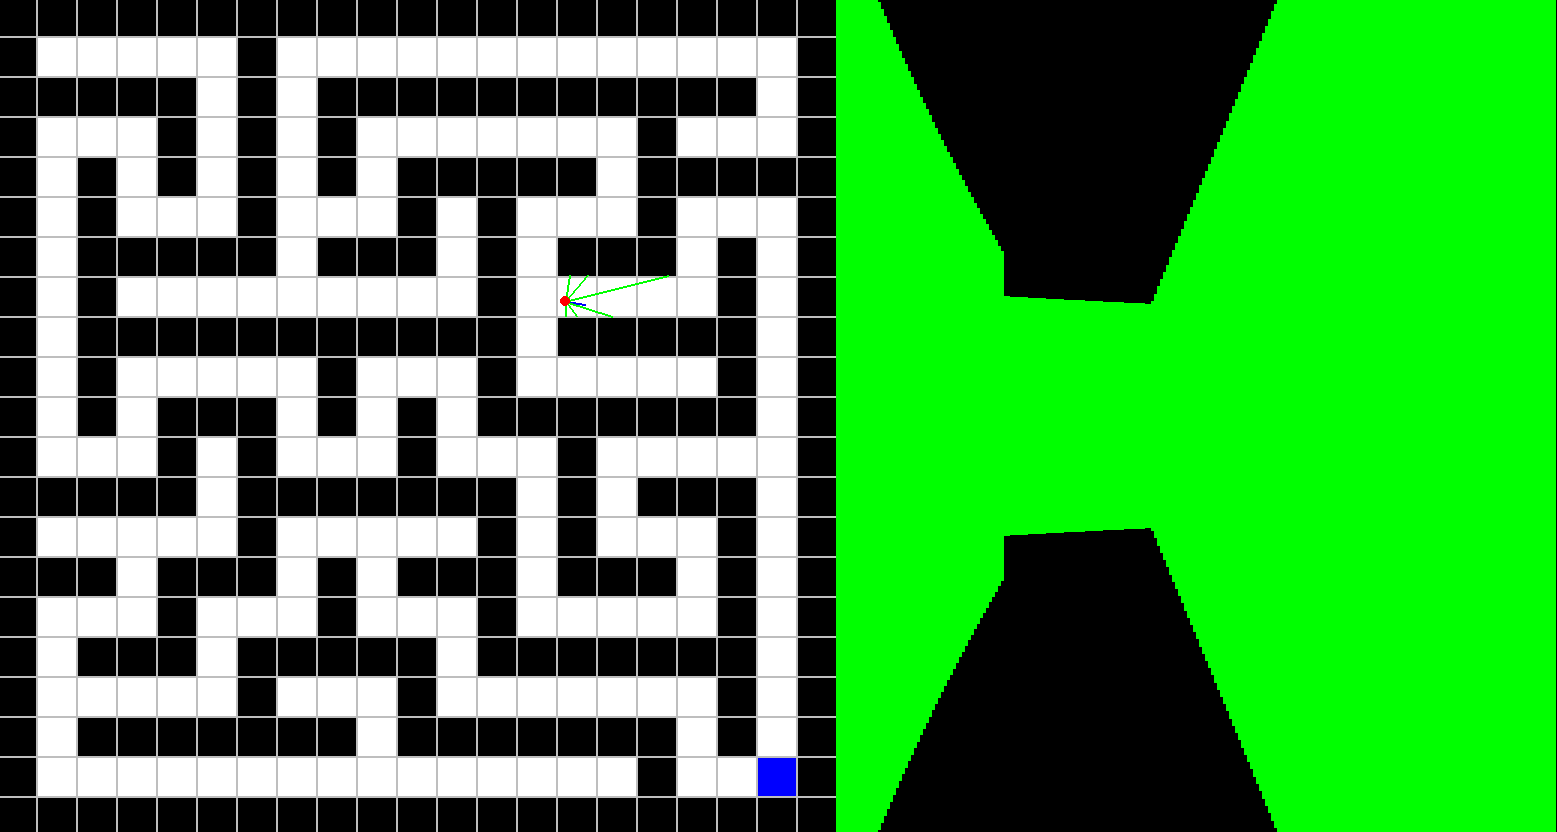

In [67]:
with open("VWA/Maze-Game.png", "rb") as bild_datei:
    html = erstelle_bild(bild_datei, 500, "Das Irrgarten Spiel")
    display(HTML(html))

Die KI startet in oberen linken Ecke und muss möglichst schnell zur blauen Zelle gelangen. Wichtig ist hierbei zu beachten, dass die KI kein vollständiges Bild des Irrgartens besitzt und nur die Information in dessen unmittelbare Umgebung erhält. Die rechte Seite der Abbildung zeigt eine visuelle Darstellung dieser eingeschränkten Wahrnehmung.

Dieses Kapitel befasst sich allein mit dem Training der KI. Hierfür verwende ich die Library "neat-python", die die notwendigen Funktionen für die Evolution des neuronalen Netzwerks bereitstellt. Anders als in den vorherigen Kapiteln werde ich nicht den verwendeten Quellcode nicht detailliert beschreiben, da viele der verwendeten Konzepte außerhalb des Bereichs der Künstlichen Intelligenz liegen. Der gesamte Code ist allerdings unten im Anhang zu finden.

## Config-Datei

Ein wichtiger Bestandteil beim Trainieren einer künstlichen Intelligenz mit der Bibliothek neat-python ist die "Config"-Datei. Diese beinhaltet sämtliche Einstellungen und Parameter für den Evolutionsprozess sowie die anfängliche Struktur der KI. Die Datei enthält viele Einstellungen, deshalb werde ich nur die wesentlichsten Informationen besprechen. Der vollständige Code für die Datei ist jedoch ebenso im Anhang zu finden.

Meine Künstliche Intelligenz besitzt sechs Eingabeneuronen. Diese stellen verschiedene Sensoren dar. In der Abbildung sind das die grünen Striche, die nach vorne gestrahlt werden, bis sie eine Wand berühren. Sie dienen dazu, der KI Informationen darüber zu geben, wie weit entfernt ein Objekt ist. Dabei besitzt sie allerdings nur sechs dieser Sensoren. Eine bessere Illustration für das Blickfeld dieser Künstlichen Intelligenz sieht demnach so aus:


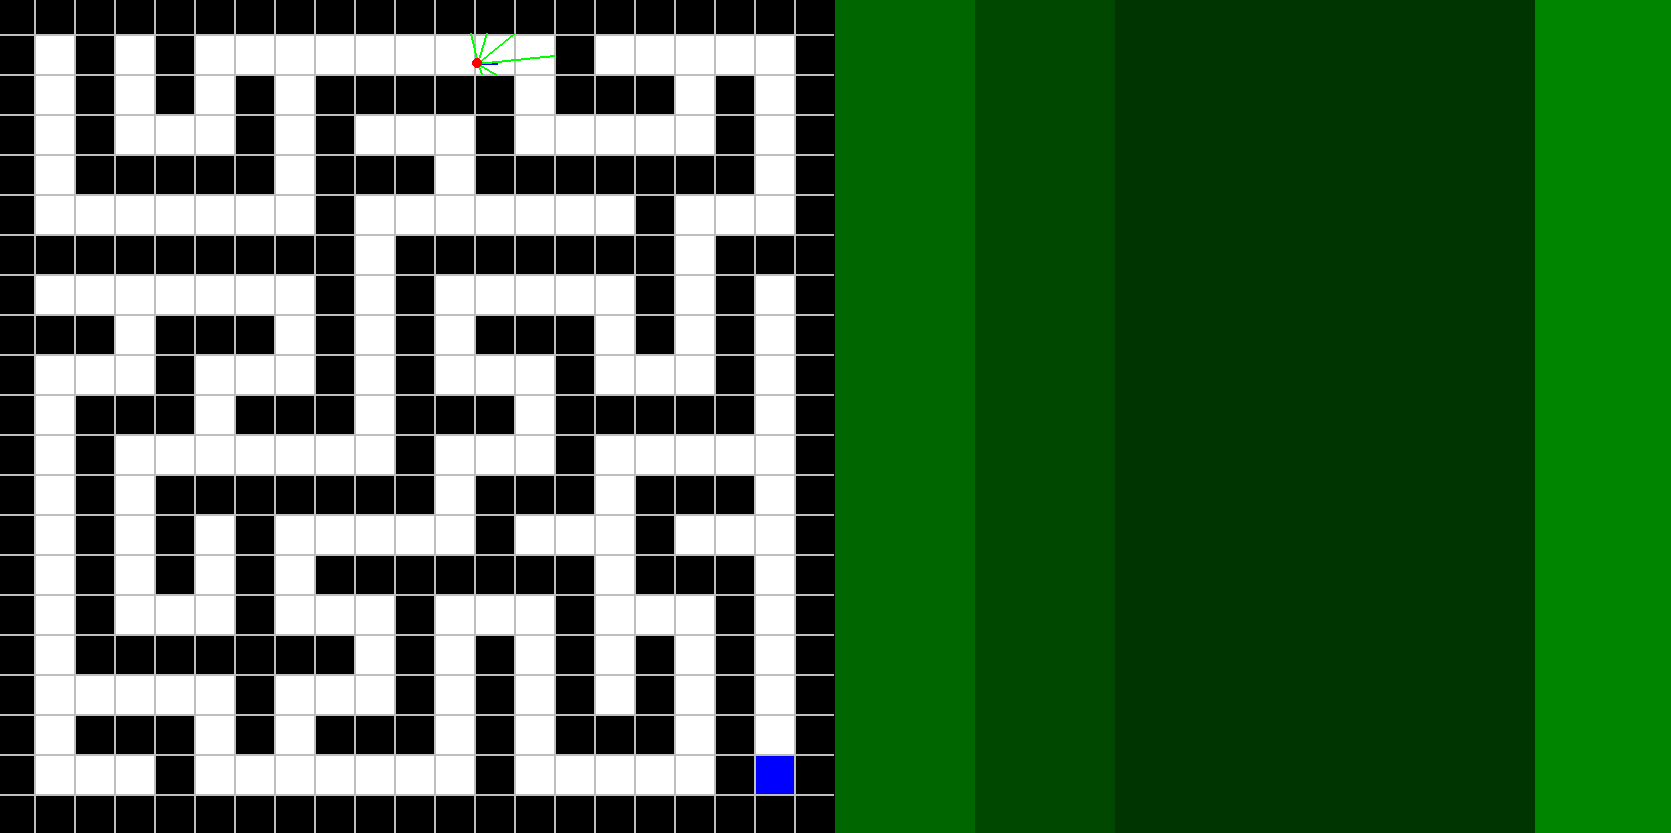

In [66]:
with open("VWA/Maze-Game-AI-View.png", "rb") as bild_datei:
    html = erstelle_bild(bild_datei, 500, "Blickfeld der KI")
    display(HTML(html))

# Fazit

Blla


# Literaturverzeichnis

Alake, Richmond (o.J.): Loss Functions in Machine Learning Explained. https://www.datacamp.com/tutorial/loss-function-in-machine-learning [Zugriff: 31.01.2025]

Anshumanm2fja (2024): What is Forward Propagation in Neural Networks? https://www.geeksforgeeks.org/what-is-forward-propagation-in-neural-networks/ [Zugriff: 16.10.2024]

Belagatti, Pavan (2024): Understanding the Softmax Activation Function: A Comprehensive Guide. https://www.singlestore.com/blog/a-guide-to-softmax-activation-function/ [Zugriff: 01.02.2025]

Bhayani, Arpit (o.J.): Genetic algorithm to solve the Knapsack Problem. https://arpitbhayani.me/blogs/genetic-knapsack/ [Zugriff: 16.12.2024]

Burton-McCreadie, Trevor (2024): The NEAT Algorithm: Evolving Neural Networks. https://blog.lunatech.com/posts/2024-02-29-the-neat-algorithm-evolving-neural-network-topologies [Zugriff: 26.02.2025]

Dey, Suman (2019): Understanding Objective Functions in Deep Learning. https://dimensionless.in/understanding-objective-functions-in-deep-learning/ [Zugriff: 20.02.2025]

Dutta, Avik (o.J.): Crossover in Genetic Algorithm. https://www.geeksforgeeks.org/crossover-in-genetic-algorithm/ [Zugriff: 10.02.2025]

Gómez Bruballa, Raúl (2018): Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names. https://gombru.github.io/2018/05/23/cross_entropy_loss/ [Zugriff: 02.02.2025]

Jung, Daniel (2014): Matrizen multiplizieren, Matrixmultiplikation, Übersicht | Mathe by Daniel Jung. https://www.youtube.com/watch?v=OphPlrzeqng [Zugriff: 22.02.2025]

Kanade, Vijay (o.J.): What Are Genetic Algorithms? Working, Applications, and Examples. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/ [Zugriff: 16.12.2024]

Khan, Azim (2024) A Beginner’s Guide to Deep Learning with MNIST Dataset. https://medium.com/@azimkhan8018/a-beginners-guide-to-deep-learning-with-mnist-dataset-0894f7183344 [Zugriff: 14.01.2025]

Kinsley, Harrison (2020) Neural Networks from Scratch - P.4 Batches, Layers, and Objects. https://www.youtube.com/watch?v=TEWy9vZcxW4 [Zugriff: 16.10.2024]

Kinsley, Harrison (2020): Neural Networks from Scratch - P.5 Hidden Layer Activation Functions. https://www.youtube.com/watch?v=gmjzbpSVY1A [Zugriff: 16.10.2024]

Kostadinov, Simeon (2019): Understanding Backpropagation Algorithm. https://medium.com/towards-data-science/understanding-backpropagation-algorithm-7bb3aa2f95fd [Zugriff: 11.02.2025]

Lheureux, Adil (o.J.): Feed-forward vs feedback neural networks. https://www.digitalocean.com/community/tutorials/feed-forward-vs-feedback-neural-networks [Zugriff: 16.10.2024]

Lodhi Ramlakhan (o.J.): Difference between Shallow and Deep Neural Networks. https://www.geeksforgeeks.org/difference-between-shallow-and-deep-neural-networks/ [Zugriff: 31.01.2025]

Muns, Andy (o.J.): Objective function types: A machine learning guide. https://telnyx.com/learn-ai/objective-function-machine-learning [Zugriff: 20.02.2025]

Mitchell, Melanie (1996): An Introduction to Genetic Algorithms. Fifth printing. Cambridge, Massachusetts: The MIT Press.

Nielsen, Michael (2015): Neural Networks and Deep Learning. http://neuralnetworksanddeeplearning.com/chap1.html [Zugriff: 16.10.2024]

Saxena, Abhimanyu (2024): Classification vs Regression in Machine Learning. https://www.appliedaicourse.com/blog/classification-vs-regression-in-machine-learning/ [Zugriff: 01.02.2025]

Sil, Pritam (o.J.): Mutation Algorithms for String Manipulation (GA). https://www.geeksforgeeks.org/mutation-algorithms-for-string-manipulation-ga/ [Zugriff: 10.02.2025]

Singh, Abhay (2025): Gradient Descent Explained: The Engine Behind AI Training. https://medium.com/@abhaysingh71711/gradient-descent-explained-the-engine-behind-ai-training-2d8ef6ecad6f [Zugriff: 03.02.2025]

Stansbury, Dustin (2020): Derivation: Error Backpropagation & Gradient Descent for Neural Networks. https://dustinstansbury.github.io/theclevermachine/derivation-backpropagation [Zugriff: 24.02.2025]

Topper, Noah (2023): Sigmoid Activation Function: An Introduction. https://builtin.com/machine-learning/sigmoid-activation-function [Zugriff: 14.01.2025]

<div id="abb">
    <h1 id="Abbildungsverzeichnis">Abbildungsverzeichnis</h1>
</div>

# Anhang

In [46]:
import nbformat
from IPython.display import Markdown, display

# Specify the tags you want to exclude.
excluded_tags = {"skip-export"}

with open("Künstliche_Intelligenz.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

all_code = "```python\n"

for cell in nb.cells:
    if cell.cell_type == "code":
        # Get the tags from the cell's metadata (if any)
        tags = cell.get("metadata", {}).get("tags", [])
        # Skip the cell if it has any tag from the excluded set
        if any(tag in excluded_tags for tag in tags):
            continue
        all_code += cell.source + "\n\n"

all_code += "```"

display(Markdown(all_code))

```python
import numpy as np  # Import des Pakets NumPy

# Die Eingabewerte der Eingabeneuronen
inputs = np.array([[0.3], [0.6]])

# Die Gewichte zwischen den zwei Eingabeneuronen und dem Ausgabeneuron
weights = np.array([0.8, 0.2])
bias = 4  # Der Bias-Wert des Ausgabeneurons

# Berechnung des Ausgabewerts des Ausgabeneurons
output = inputs[0] * weights[0] + inputs[1] * weights[1] + bias
print(output)

inputs = np.array([1.2, 3.2])

# Gewichte zwischen Eingabeneuronen und Ausgabeneuronen
weights1 = np.array([0.8, 1.3])  # Gewichte für das erste Ausgabeneuron
weights2 = np.array([3.1, 1.6])  # Gewichte für das zweite Ausgabeneuron

bias1 = 4  # Bias-Wert für das erste Ausgabeneuron
bias2 = 3  # Bias-Wert für das zweite Ausgabeneuron

# Der Ausgabewert des ersten Ausgabeneurons
output1 = inputs[0] * weights1[0] + inputs[1] * weights1[1] + bias1

# Der Ausgabewert des zweiten Ausgabeneurons
output2 = inputs[0] * weights2[0] + inputs[1] * weights2[1] + bias2

print(output1, output2)

inputs = np.array([[1.2], [3.2]])

# Gewichtsmatrix zwischen Eingabeneuronen und Ausgabeneuronen (4 x 2)
weights = np.array(
    [
        [0.8, 1.3],  # Gewichte des ersten Ausgabenneuron
        [3.1, 1.6],  # Gewichte des zweiten Ausgabenneuron
    ]
)

# Bias-Vektor für die Ausgabeneuronen (2 x 1)
bias = np.array([[4], [3]])

# Berechnung der Ausgabewerte durch Matrixmultiplikation
outputs = np.dot(weights, inputs) + bias  # Vektor von Ausgabewerten z (1 x 2)
print(outputs)

# Eingabematrix einer Batch mit 4 Trainingsbeispielen,
# wobei jedes Beispiel 2 Eingabewerte enthält (4 x 2)
inputs = np.array([[1.2, 3.2, 4.2, 3.1], [3.2, 1.2, 0.2, 2.2]])

# Berechnung der Ausgabewerte durch Matrixmultiplikation
outputs = np.dot(weights, inputs) + bias  # Matrix von Ausgabewerten (2 x 4)
print(outputs)

class Layer:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs: Anzahl an Eingabewerten (bzw. Neuronen der vorherigen Schicht).
        n_neurons: Anzahl an Neuronen für diese Schicht.
        """
        self.weights = 0.1 * np.random.randn(n_neurons, n_inputs)  # Gewichtsmatrix
        self.bias = 0.1 * np.random.randn(n_neurons, 1)  # Bias-Vektor

    def forward(self, inputs):
        """
        Berechnung des Ausgabewerts für die Neuronen in dieser Schicht basierend
        auf den Eingabewerte "inputs".
        """
        self.saved_inputs = inputs  # Eingabewerte für spätere Verwendung speichern
        outputs = np.dot(self.weights, inputs) + self.bias  # Ausgabewerte als Matrix
        return outputs  # Rückgabe der Ausgabewerte

# Eingabeschicht mit 2 Neuronen → verborgenen Schicht mit 4 Neuronen
hidden_layer = Layer(2, 4)

# Verborgenen Schicht mit 4 Neuronen → Ausgabeschicht mit 5 Neuronen
output_layer = Layer(4, 5)

# Ausgabewerte für die verborgene Schicht
hidden_layer_outputs = hidden_layer.forward(inputs)

# Ausgabewerte für die Ausgabeschicht
output_layer_outputs = output_layer.forward(hidden_layer_outputs)
print(output_layer_outputs)

print(output_layer_outputs.shape)

class Sigmoid:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        activated_outputs = 1 / (1 + np.exp(-raw_outputs))
        self.saved_activated_outputs = (
            activated_outputs  # Aktivierte Ausgaben für spätere Verwendung speichern
        )
        return activated_outputs

output_layer = Layer(2, 4)
activation_function = Sigmoid()

raw_outputs = output_layer.forward(inputs)
activated_outputs = activation_function.forward(raw_outputs)
print(activated_outputs)

class ReLU:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        self.saved_raw_outputs = raw_outputs
        activated_outputs = np.maximum(0, raw_outputs)
        return activated_outputs

class Softmax:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        # Exponierte Werte
        exponentiated_values = np.exp(raw_outputs - np.max(raw_outputs, axis=0))
        # Summe der exponierten Werte
        sum_values = np.sum(exponentiated_values, axis=0, keepdims=True)
        # Normalisierte / aktivierte Ausgaben
        normalized_outputs = exponentiated_values / sum_values
        return normalized_outputs

class Network:
    def __init__(
        self,
    ):
        self.layers = []
        self.activation_functions = []

    def add_layer(self, layer, activation_function):
        """
        Fügt eine instanzierte Schicht "layer" mit ihrer entsprechenden Aktivierungsfunktion
        "activation_function" zum Netzwerk hinzu.
        """
        self.layers.append(layer)
        self.activation_functions.append(activation_function)

    def forward_propagation(self, inputs):
        """
        Berechnet die Vorhersagen "predictions" des Netzwerkes anhand der Eingabewerte
        "inputs" der Eingabeschicht.
        """
        current_inputs = inputs
        for layer, activation_function in zip(self.layers, self.activation_functions):
            raw_outputs = layer.forward(current_inputs)
            activated_outputs = activation_function.forward(raw_outputs)
            # Aktivierte Ausgaben der Schicht werden als Eingabewerte für die nächste Schicht verwendet
            current_inputs = activated_outputs
        predictions = current_inputs
        return predictions

network = Network()
network.add_layer(
    Layer(2, 4),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(4, 5),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

network.forward_propagation(inputs)

# Lade Tranings und Test Daten

from data.load_data import load_test_data

import gzip
import numpy as np
import pickle


def load_images(file):
    with gzip.open(file, "r") as f:
        f.read(4)  # Überspringen des Headers (Magic Number)
        n_images = int.from_bytes(f.read(4), "big")
        f.read(8)  # Überspringen des Headers (Anzahl Reihen und Zeilen)

        # Lesen der Bilddaten
        # Pixelwerte sind von 0 bis 255 als unsigned Byte gespeichert
        image_data = f.read()
        images = (
            np.frombuffer(image_data, dtype=np.uint8).reshape(n_images, 784).T
        )
        images = (
            images.reshape(images.shape[0], -1).astype(np.float32) - 127.5
        ) / 127.5  # Zwischen -1 und 1
        return images


def load_labels(file):
    with gzip.open(file, "r") as f:
        f.read(8)  # Überspringen des Headers (Magic Number und Anzahl der Labels)
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        labels = np.eye(10)[labels].T # Von Ziffern zu "Wahrscheinlichkeiten"
        return labels


def load_trainings_data():
    images = load_images("data/train-images-idx3-ubyte.gz")
    labes = load_labels("data/train-labels-idx1-ubyte.gz")
    return images, labes


def load_test_data():
    images = load_images("data/t10k-images-idx3-ubyte.gz")
    labes = load_labels("data/t10k-labels-idx1-ubyte.gz")
    return images, labes

network = Network()
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)   

def test_neural_network(network):
    # Bilder (Eingabewerte) und labels (tatsächliche Zielwerte als Wahrscheinlichkeiten)
    images, labels = load_test_data()

    # Vorhersagen als Wahrscheinlichkeitsverteilung
    predictions = network.forward_propagation(images)

    N = predictions.shape[1] # Anzahl an Trainingsbeispielen
    
    # Vorhersagen als Ziffern
    predicted_numbers = np.argmax(predictions, axis=0)

    # tatsächliche Zielwerte als Ziffern
    actual_values = np.argmax(labels, axis=0)

    # Vektor aus "Richtig Falsch" Werten
    comparisons = predicted_numbers == actual_values

    # Summe / Anzahl an richtigen Aussagen
    n_correct_predictions = sum(comparisons)
    
    # Genauigkeit des neuronalen Netzwerkes
    accuracy = n_correct_predictions / N
    
    print(accuracy)


test_neural_network(network)

class MeanSquaredError:
    def calculate_cost(predictions, targets):
        losses = np.sum(np.square(predictions - targets), axis=0)
        cost = np.mean(losses)
        return cost

class CategoricalCrossEntropy:
    def calculate_cost(predictions, targets):
        predictions = np.clip(predictions, 1e-7, 1 - 1e-7)
        losses = -np.sum(targets * np.log(predictions), axis=0)
        cost = np.mean(losses)
        return cost

class GD:
    def __init__(self, network, learning_rate):
        """
        network: Das Netzwerk, das optimiert werden soll
        learning_rate: Die Lernrate, die die Schrittgröße bestimmt
        """
        self.network = network
        self.learning_rate = learning_rate

    def update_parameters(self):
        """
        Aktualisiert die Parameter (Gewichte und Bias-Werte) aller Schichten im Netzwerk basierend auf den Gradienten
        """
        # Iteriert über alle Schichten des Netzwerks und aktualisiert deren Parameter
        for layer in self.network.layers:
            # Aktualisiert die Gewichte der aktuellen Schicht mit dem negativen Gradienten
            # multipliziert mit der Lernrate, um den Schritt zu skalieren
            layer.weights -= self.learning_rate * layer.gradient_weights
            # Aktualisiert die Bias-Werte der aktuellen Schicht mit dem negativen Gradienten
            # multipliziert mit der Lernrate, um den Schritt zu skalieren
            layer.bias -= self.learning_rate * layer.gradient_bias

class Layer(Layer):
    def backwards(self, gradient_raw_outputs):
        """
        Berechnet den Gradienten der Cost Function in Bezug zu den
        Gewichten und Bias-Werten der aktuellen Schicht und aktivierten Ausgaben
        der vorherigen Schicht.

        gradient_raw_outputs: Gradient der Cost Function in Bezug zu den rohen Ausgaben
        der aktuellen Schicht (dJ/dZ).
        """

        # Gradient der Cost Function in Bezug zu den Gewichten von der aktuellen Schicht (dJ/dW).
        self.gradient_weights = np.dot(gradient_raw_outputs, self.saved_inputs.T)

        # Gradient in Bezug zu den Bias-Werten (dJ/db).
        self.gradient_bias = np.sum(gradient_raw_outputs, axis=1, keepdims=True)

        # Gradient in Bezug zu den aktivierten Ausgaben der vorherigen Schicht (dJ/dA).
        gradient_activated_outputs = np.dot(self.weights.T, gradient_raw_outputs)
        return gradient_activated_outputs

class Sigmoid(Sigmoid):
    def backwards(self, gradient_activated_outputs):
        """
        Berechnet den Gradienten der Cost Function in Bezug zu
        den rohen Ausgaben der aktuellen Schicht (dJ/dZ)

        gradient_activated_outputs: Gradient der Cost Function in Bezug zu den aktivierten Ausgaben
        der aktuellen Schicht (dJ/dA)
        """
        # Gradient in Bezug zu (A*(A-1))
        d_activated_d_raw = self.saved_activated_outputs * (
            1 - self.saved_activated_outputs
        )

        gradient_raw_outputs = gradient_activated_outputs * d_activated_d_raw
        return gradient_raw_outputs


class ReLU(ReLU):
    def backwards(self, gradient_activated_outputs):
        """
        Berechnet den Gradienten der Cost Function in Bezug zu
        den rohen Ausgaben der aktuellen Schicht (dJ/dZ).

        gradient_activated_outputs: Gradient der Cost Function in Bezug zu den aktivierten Ausgaben
        der aktuellen Schicht (dJ/dA).
        """
        # Gradient der Cost Function in Bezug zu den rohen Ausgaben (dJ/dZ).
        gradient_raw_outputs = gradient_activated_outputs * (self.saved_raw_outputs > 0)
        return gradient_raw_outputs

class MeanSquaredError(MeanSquaredError):
    def backwards(predictions, targets):
        """
        Berechnet den Gradienten des Mean Squared Error in Bezug zu den Vorhersagen.
        """
        N = predictions.shape[1]  # Anzahl an Trainingsbeispielen
        gradient_predictions = (2 / N) * (predictions - targets) / len(predictions)
        return gradient_predictions

class CategoricalCrossEntropy(CategoricalCrossEntropy):
    def backwards(predictions, targets):
        """
        Berechnet den Gradienten des Categorical Cross Entropy in
        Bezug zu den rohen Ausgaben der Ausgabenschicht (dJ/dZ).
        """
        N = predictions.shape[1]  # Anzahl an Trainingsbeispielen
        gradient_raw_outputs = (predictions - targets) / N
        return gradient_raw_outputs


class Softmax(Softmax):
    def backwards(self, gradient_raw_outputs):
        # Gibt die Gradienten direkt weiter (Softmax wird in Kombination
        # mit Categorical Cross Entropy verwendet).
        return gradient_raw_outputs

class Network(Network):
    def __init__(self, cost_function):
        self.layers = []
        self.activation_functions = []
        self.cost_function = cost_function

    def backpropagation(self, predictions, targets):
        # Gradient der Cost Function in Bezug zu den Vorhersagen (dJ/dY).
        # Beim Categorical Cross Entropy + Softmax sind diese allerdings im Bezug zu
        # den rohen Ausgaben der Ausgabenschicht (dJ/dZ).
        gradient_predictions = self.cost_function.backwards(predictions, targets)
        # Der Gradient der Vorhersagen ist identisch mit dem Gradient der aktivierten
        # Ausgaben der Ausgabenschicht
        gradient_activated_outputs = gradient_predictions
        # Rückwärts berechnet, von Ausgabeschicht zu Eingabeschicht.
        for layer, activation_function in zip(
            reversed(self.layers), reversed(self.activation_functions)
        ):
            # Gradient der Cost Function in Bezug zu den aktivierten Ausgaben
            # der aktuellen Schicht(dJ/dA).
            gradient_raw_outputs = activation_function.backwards(
                gradient_activated_outputs
            )

            # Gradienten der Cost Function in Bezug zu den Gewichten (dJ/dW)
            # und den Bias-Werten der aktuellen Schicht (dJ/db).
            # Berechnet zusätzlich den Gradienten der Cost Function in Bezug zu den rohen Ausgaben
            # der vorherigen Schicht(dJ/dZ).
            gradient_activated_outputs = layer.backwards(gradient_raw_outputs)

class SGD(GD):
    def create_batches(self, inputs, targets, batch_size):
        N = inputs.shape[1]  # Anzahl an Trainingsdaten
        # Trainingsset in mini Batches eingeteilt
        batches = []
        for i in range(0, N, batch_size):
            batch_inputs = inputs[:, i : i + batch_size]
            batch_targets = targets[:, i : i + batch_size]
            single_batch = (batch_inputs, batch_targets)
            batches.append(single_batch)
        return batches
    
    def optimise(
        self,
        inputs,
        targets,
    ):
        # Vorwärtsdurchlauf: Berechnung der Vorhersagen
        predictions = self.network.forward_propagation(inputs)

        cost = self.network.cost_function.calculate_cost(predictions, targets)

        # Rückwärtsdurchlauf: Berechnung der Gradienten
        self.network.backpropagation(predictions, targets)

        # Aktualisiert die Gewichte und Bias-Werte basierend auf die Gradienten
        self.update_parameters()
        return cost

    def train(self, inputs, targets, batch_size):
        batches = self.create_batches(inputs, targets, batch_size)
        cost_history = []
        avg_epoch_cost = 1
        while avg_epoch_cost > 0.2:
            epoch_cost_history = []
            for batch_inputs, batch_targets in batches:
                cost = self.optimise(batch_inputs, batch_targets)
                self.optimise(batch_inputs, batch_targets)
    
                epoch_cost_history.append(cost)
                cost_history.append(cost)
            avg_epoch_cost = np.mean(epoch_cost_history)
    
        return cost_history

# Categorical Cross Entropy als Cost Function
network = Network(CategoricalCrossEntropy)
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

training_images, training_labels = load_trainings_data()

sgd = SGD(network, learning_rate=0.1)
cost_history = sgd.train(
            training_images,
            training_labels,
            batch_size=64,
        )

test_neural_network(network)

class Item:
    def __init__(self, name, mass, value):
        self.name = name
        self.mass = mass
        self.value = value


item_list = [
    # Handy mit 3kg Masse und einem Geldwert von 5€
    Item("Handy", mass=3, value=5),
    Item("Laptop", 6, 10),
    Item("Diamant", 1, 30),
    Item("Brot", 1, 1),
]


class Individual:
    def __init__(self, item_bits):
        self.item_bits = item_bits

    def print_items_in_backpack(self):
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                print(
                    f"Gegenstand: {item.name}, Masse: {item.mass}kg, Geldwert: {item.value}€"
                )


individual = Individual([0, 1, 0, 1])

individual.print_items_in_backpack()

import random


class Individual(Individual):

    def create_random_individual():

        random_item_bits = []

        for _ in item_list:  # für jedes Element in der Gegenstände Liste

            bit = random.choice([0, 1])  # zufällig 1 oder 0 wählen

            random_item_bits.append(bit)

        return Individual(random_item_bits)


class Population:

    def __init__(self, population_size):

        self.population_size = population_size

        self.create_initial_population()

    def create_initial_population(self):

        self.population = []

        while population_size > len(self.population):

            individual = Individual.create_random_individual()

            self.population.append(individual)

    def print_population(self):

        for individual in self.population:

            print(individual.item_bits)


population_size = 8


population = Population(population_size)
population.print_population()

class Individual(Individual):
    def calculate_fitness(self, mass_limit):
        total_mass = 0
        total_value = 0
        # Gehe jeden Gegenstand des Individuums durch
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                total_mass += item.mass
                total_value += item.value

        if total_mass > mass_limit:
            self.fitness_value = 0
            return

        self.fitness_value = total_value


class Population(Population):
    def calculate_fitness(self, mass_limit):
        for individual in self.population:
            individual.calculate_fitness(mass_limit)


mass_limit = 5
population = Population(population_size)
population.calculate_fitness(mass_limit)

def tournament(enemy1, enemy2):
    if enemy1.fitness_value > enemy2.fitness_value:
        return enemy1
    else:
        return enemy2


def selection(population):
    enemies = random.sample(population, 4)  # 4 zufällige Individuuen
    winner1 = tournament(enemies[0], enemies[1])
    winner2 = tournament(enemies[2], enemies[3])
    return [winner1, winner2]


selection(population.population)

def crossover_parents(parent1, parent2):
    bits_amount = len(parent1.item_bits)
    half_amount = int(bits_amount / 2)

    # Erste Hälfte von Elternteil 1 plus zweite Hälfte von Elternteil 2
    child1_bits = parent1.item_bits[:half_amount] + parent2.item_bits[half_amount:]

    # Erste Hälfte von Elternteil 2 plus zweite Hälfte von Elternteil 1
    child2_bits = parent2.item_bits[:half_amount] + parent1.item_bits[half_amount:]

    child1 = Individual(child1_bits)
    child2 = Individual(child2_bits)
    return (child1, child2)

def mutatate_child(individual):
    bits_amount = len(individual.item_bits)
    random_bit = random.randrange(bits_amount)
    individual.item_bits[random_bit] = (
        1 - individual.item_bits[random_bit]
    )  # 1 wird zu null und umgekehrt

class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)

class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)
        while population_size > len(new_population):
            parent1, parent2 = selection(self.population)

            child1, child2 = crossover_parents(parent1, parent2)

            mutatate_child(child1)
            mutatate_child(child2)

            new_population.append(child1)
            new_population.append(child2)

        return new_population

class Population(Population):
    def start(self, mass_limit):
        self.calculate_fitness(mass_limit)
        for _ in range(500):
            self.population = self.create_new_population()
            self.calculate_fitness(mass_limit)

            self.population.sort(
                reverse=True, key=lambda individual: individual.fitness_value
            )

            best_individual = self.population[0]

        print(best_individual.fitness_value)
        print(best_individual.item_bits)


population_size = 20
mass_limit = 3000
Population(population_size).start(mass_limit)

# Code für NEAT KI

import pygame
import neat

# Konfigurations Datei erstellen

config = """
[NEAT]
fitness_criterion     = max
fitness_threshold     = 100000000
pop_size              = 100
reset_on_extinction   = True

[DefaultGenome]
# node activation options
activation_default      = tanh
activation_mutate_rate  = 0.01
activation_options      = tanh

# node aggregation options
aggregation_default     = sum
aggregation_mutate_rate = 0.01
aggregation_options     = sum

# node bias options
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_max_value          = 30.0
bias_min_value          = -30.0
bias_mutate_power       = 0.5
bias_mutate_rate        = 0.7
bias_replace_rate       = 0.1

# genome compatibility options
compatibility_disjoint_coefficient = 1.0
compatibility_weight_coefficient   = 0.5

# connection add/remove rates
conn_add_prob           = 0.5
conn_delete_prob        = 0.5

# connection enable options
enabled_default         = True
enabled_mutate_rate     = 0.01

feed_forward            = True
initial_connection      = full

# node add/remove rates
node_add_prob           = 0.2
node_delete_prob        = 0.2

# network parameters
num_hidden              = 0
num_inputs              = 6
num_outputs             = 2

# node response options
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_max_value      = 30.0
response_min_value      = -30.0
response_mutate_power   = 0.0
response_mutate_rate    = 0.0
response_replace_rate   = 0.0

# connection weight options
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_max_value        = 30
weight_min_value        = -30
weight_mutate_power     = 0.5
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1

[DefaultSpeciesSet]
compatibility_threshold = 2.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation       = 20
species_elitism      = 2

[DefaultReproduction]
elitism            = 3
survival_threshold = 0.2
"""

config_file = open("config.txt", "w")
config_file.write(config)
config_file.close()

# Code zum erstellen von Irrgarten / Mazes

# Code zum Erstellen von Irrgarten Sturkturen

import random


def create_empty_maze(maze_size):
    maze = []
    maze_cell = [1, 1, 0]  # east_wall south_wall visited
    for _ in range(maze_size):
        row = []
        for _ in range(maze_size):
            row.append(maze_cell.copy())
        maze.append(row)
    return maze


def transform_maze(maze):
    maze_size = len(maze)
    new_maze_size = maze_size * 2 - 1
    new_maze = []
    for _ in range(new_maze_size):
        row = [0] * (new_maze_size)
        new_maze.append(row)
    for ir, maze_row in enumerate(maze):
        for ic, maze_cell in enumerate(maze_row):
            if (2 * ic + 1) < new_maze_size and maze_cell[0]:  # east
                new_maze[2 * ir][2 * ic + 1] = 1
            if (2 * ir + 1) < new_maze_size and maze_cell[1]:  # south
                new_maze[2 * ir + 1][2 * ic] = 1
            if (2 * ir + 1) < new_maze_size and (2 * ic + 1) < new_maze_size:
                new_maze[2 * ir + 1][2 * ic + 1] = 1  # corner

    return new_maze


def add_borders(maze):
    maze_size = len(maze)
    new_maze_size = maze_size * 2 + 1
    for maze_row in maze:
        maze_row.insert(0, 1)
        maze_row.append(1)
    maze.insert(0, [1] * new_maze_size)
    maze.append([1] * new_maze_size)
    return maze


def create_maze(maze_size: int):
    stack: list[tuple[int, int]] = []
    visited_cells = 1
    stack.append((0, 0))
    maze = create_empty_maze(maze_size)
    maze_cells_amount = pow(maze_size, 2)
    maze[0][0][2] = 1
    while visited_cells < maze_cells_amount:
        x, y = stack[len(stack) - 1]
        neighbours = []

        if y > 0 and not maze[y - 1][x][2]:  # North
            neighbours.append(0)

        if y < maze_size - 1 and not maze[y + 1][x][2]:  # South
            neighbours.append(1)

        if x > 0 and not maze[y][x - 1][2]:  # West
            neighbours.append(2)

        if x < maze_size - 1 and not maze[y][x + 1][2]:  # East
            neighbours.append(3)

        if len(neighbours) == 0:
            stack.pop()
            continue

        rand_i = random.randrange(0, len(neighbours))

        match neighbours[rand_i]:
            case 0:  # North
                stack.append((x, y - 1))
                maze[y - 1][x][1] = 0  # South Wall
                maze[y - 1][x][2] = 1
            case 1:  # South
                stack.append((x, y + 1))
                maze[y][x][1] = 0  # South Wall
                maze[y + 1][x][2] = 1
            case 2:  # West
                stack.append((x - 1, y))
                maze[y][x - 1][0] = 0  # East Wall
                maze[y][x - 1][2] = 1
            case 3:  # East
                stack.append((x + 1, y))
                maze[y][x][0] = 0  # East Wall
                maze[y][x + 1][2] = 1

        visited_cells += 1
    maze = transform_maze(maze)
    return add_borders(maze)

# Code zum erstellen von Irrgarten Objeckten (Mit Rendering)

import random
import pygame


class Maze:
    def __init__(self, maze_size: int, cell_width: int) -> None:
        self.maze: list[list[int]] = create_maze(maze_size)
        self.cell_width = cell_width
        maze_surface_size = (len(self.maze)) * cell_width
        self.image = pygame.Surface((maze_surface_size, maze_surface_size))
        self.rect = self.image.get_rect()
        self.boxes: list[pygame.Rect] = []
        self.boxes_type: list[bool] = []
        self.path_cells: list[pygame.Rect] = []
        self.setup(maze_size, cell_width)

    def setup(self, maze_size: int, cell_width: int):
        # self.create_start_and_end(maze_size)
        self.maze[maze_size * 2 - 1][maze_size * 2 - 1] = 2
        maze_cell = pygame.Surface((cell_width, cell_width))
        goal = maze_cell.copy()
        goal.fill("Blue")
        self.image.fill("White")
        current_rect = maze_cell.get_rect()
        for maze_row in self.maze:
            current_rect[0] = 0
            for maze_block in maze_row:
                if maze_block == 1:
                    wall = current_rect.copy()
                    self.image.blit(maze_cell, wall)
                    self.boxes.append(wall)
                    self.boxes_type.append(False)
                elif maze_block == 2:
                    wall = current_rect.copy()
                    self.image.blit(goal, current_rect)
                    self.boxes.append(wall)
                    self.boxes_type.append(True)
                else:
                    path_cell = current_rect.copy()
                    self.path_cells.append(path_cell)

                current_rect.x += cell_width
            current_rect.y += cell_width

        for i in range(len(self.maze) + 1):
            pygame.draw.line(
                self.image,
                "Gray",
                (0, cell_width * i),
                (self.image.width, cell_width * i),
                2,
            )  # Vertical Line
            pygame.draw.line(
                self.image,
                "Gray",
                (cell_width * i, 0),
                (cell_width * i, self.image.width),
                2,
            )  # Horizontal Line

    def draw(self, screen: pygame.Surface):
        screen.blit(self.image, self.rect)


# Code für den Raycaster

import math

import pygame


def raycast_horizontal(
    maze, cell_width: int, rect: pygame.FRect, angle: float
) -> tuple[float, float, float, bool]:
    ray_x = 0
    ray_y = 0
    off_x = 0
    off_y = 0
    goal = False

    maze_size = len(maze)
    maze_width = maze_size * cell_width

    if angle == 0:
        return (0, 0, maze_width, goal)
    inverse_tan = 1 / math.tan(angle)

    if angle > math.pi:  # forward
        ray_y = math.floor(rect.centery / cell_width) * cell_width - 0.0001
        ray_sin = rect.centery - ray_y
        ray_cos = inverse_tan * ray_sin
        ray_x = rect.centerx - ray_cos
        off_y = -cell_width
        off_x = off_y * inverse_tan
    elif angle < math.pi:  # backward
        ray_y = math.ceil(rect.centery / cell_width) * cell_width
        ray_sin = rect.centery - ray_y
        ray_cos = inverse_tan * ray_sin
        ray_x = rect.centerx - ray_cos
        off_y = cell_width
        off_x = off_y * inverse_tan
    else:  # left or right
        return (0, 0, maze_width, goal)

    depth = maze_size
    while depth:
        mapx: int = int(ray_x / cell_width)
        mapy: int = int((ray_y / cell_width))
        inside_maze = (mapx < maze_size) and (mapx >= 0)
        if not inside_maze:
            return (0, 0, maze_width, goal)
        wall = maze[mapy][mapx]
        if wall:
            if wall == 2:
                goal = True
            ray_len_x = rect.centerx - ray_x
            ray_len_y = rect.centery - ray_y
            ray_len = math.sqrt(math.pow(ray_len_x, 2) + math.pow(ray_len_y, 2))
            return (ray_x, ray_y, ray_len, goal)
        ray_x += off_x
        ray_y += off_y
        depth -= 1
    return (0, 0, maze_width, goal)


def raycast_vertical(
    maze, cell_width: int, rect: pygame.FRect, angle: float
) -> tuple[float, float, float, bool]:
    ray_x = 0
    ray_y = 0
    off_x = 0
    off_y = 0
    goal = False

    maze_size = len(maze)
    maze_width = maze_size * cell_width

    if (angle > math.pi / 2) and (angle < 3 * math.pi / 2):  # left
        ray_x = math.floor(rect.centerx / cell_width) * cell_width - 0.0001
        ray_cos = rect.centerx - ray_x
        ray_sin = math.tan(angle) * ray_cos
        ray_y = rect.centery - ray_sin
        off_x = -cell_width
        off_y = off_x * math.tan(angle)
    elif (angle < math.pi / 2) or (angle > 3 * math.pi / 2):
        ray_x = math.ceil(rect.centerx / cell_width) * cell_width
        ray_cos = rect.centerx - ray_x
        ray_sin = math.tan(angle) * ray_cos
        ray_y = rect.centery - ray_sin
        off_x = cell_width
        off_y = off_x * math.tan(angle)
    else:  # forward or backwards
        return (0, 0, maze_width, goal)

    depth = maze_size
    while depth:
        mapx: int = int(ray_x / cell_width)
        mapy: int = int((ray_y / cell_width))
        inside_maze = (mapy < maze_size) and (mapy >= 0)
        if not inside_maze:
            return (0, 0, maze_width, goal)
        wall = maze[mapy][mapx]
        if wall:
            if wall == 2:
                goal = True
            ray_len_x = rect.centerx - ray_x
            ray_len_y = rect.centery - ray_y
            ray_len = math.sqrt(math.pow(ray_len_x, 2) + math.pow(ray_len_y, 2))
            return (ray_x, ray_y, ray_len, goal)

        ray_x += off_x
        ray_y += off_y
        depth -= 1
    return (0, 0, maze_width, goal)


def raycast(maze: Maze, rect: pygame.FRect, angle: float):
    ray_h = raycast_horizontal(maze.maze, maze.cell_width, rect, angle)
    ray_v = raycast_vertical(maze.maze, maze.cell_width, rect, angle)
    ray = min(ray_h, ray_v, key=lambda ray: ray[2])
    return ray


def raycasting(
    maze: Maze, rect: pygame.FRect, player_angle: float, fov: int, amount: int
):
    fov_rad = math.radians(fov)
    fov_step = fov_rad / amount
    rays: list[tuple[float, float, float, float, bool]] = []
    for current_step in range(amount):
        angle = player_angle - fov_rad / 2 + fov_step * current_step
        if angle < 0:
            angle += 2 * math.pi
        if angle > 2 * math.pi:
            angle -= 2 * math.pi
        ray = raycast(maze, rect, angle)
        ray_length = ray[2]
        if ray[3] == True:
            ray_length = maze.image.width
        no_fish_angle = player_angle - angle
        if no_fish_angle < 0:
            no_fish_angle += 2 * math.pi
        if no_fish_angle > 2 * math.pi:
            no_fish_angle -= 2 * math.pi
        no_fish_length = math.cos(no_fish_angle) * ray[2]
        rays.append((ray[0], ray[1], ray_length, no_fish_length, ray[3]))
    return rays

# Code für Player Klasse

import neat
from pygame import rect, key
import pygame
import math


class Player:
    speed = 4
    fov = 180
    rays_amount = 6
    LIFE_TIME = 40

    def __init__(
        self,
        pos: tuple[int, int],
        radius: int,
        boxes: list[pygame.Rect],
        boxes_type: list[bool],
        path_cells: list[pygame.Rect],
        genome,
        net: neat.nn.FeedForwardNetwork,
        maze_width: int,
        cell_width: int,
        best_genome: bool,
    ) -> None:
        self.image = pygame.Surface((radius * 2, radius * 2))
        self.rect: rect.FRect = self.image.get_frect(center=pos)
        self.boxes = boxes
        self.boxes_type = boxes_type
        self.path_cells = path_cells
        self.path_cells_score: list[int] = [0] * len(self.path_cells)
        self.genome = genome
        self.net = net
        self.best_genome = best_genome
        self.life_time = self.LIFE_TIME

        self.maze_width = maze_width
        self.cell_width = cell_width
        self.maze_inside_width = maze_width - cell_width * 2

        self.image.set_colorkey((0, 0, 0))
        pygame.draw.circle(self.image, "Red", (radius, radius), radius)

        self.direction = pygame.Vector2()
        self.angle = 0
        self.angle_direction = pygame.Vector2()
        self.rays: list[tuple[float, float, float, float, bool]] = []

    def wasd_input(self):
        keys = key.get_pressed()
        self.direction.x = int(keys[pygame.K_d]) - int(keys[pygame.K_a])
        self.direction.y = int(keys[pygame.K_s]) - int(keys[pygame.K_w])
        if self.direction:
            self.direction = self.direction.normalize()

    def angle_input(self):
        keys = key.get_pressed()
        # self.get_ai_input_data()
        self.angle += (keys[pygame.K_d] - keys[pygame.K_a]) / 10
        if self.angle < 0:
            self.angle += 2 * math.pi
        if self.angle > 2 * math.pi:
            self.angle -= 2 * math.pi
        direction = keys[pygame.K_w] - keys[pygame.K_s]
        self.angle_direction.x = math.cos(self.angle)
        self.angle_direction.y = math.sin(self.angle)
        self.direction.x = self.angle_direction.x * direction
        self.direction.y = self.angle_direction.y * direction

    def get_ai_input_data(self):
        inputs = []
        for ray in self.rays:
            normalised_ray = ray[2] / (
                self.maze_inside_width
            )  # when diagonal potentialn to still be above 1
            inputs.append(normalised_ray)
        return inputs

    def ai_input(self):
        inputs = self.get_ai_input_data()
        output = self.net.activate(inputs)
        self.angle -= 0.1  # left
        if max(output[0], 0):  # if below 0 then 0
            self.angle += 0.2  # right
        direction = 0
        if max(output[1], 0):  # if below 0 then 0
            direction = 1  # forward
        if self.angle < 0:
            self.angle += 2 * math.pi
        if self.angle > 2 * math.pi:
            self.angle -= 2 * math.pi
        self.angle_direction.x = math.cos(self.angle)
        self.angle_direction.y = math.sin(self.angle)
        self.direction.x = self.angle_direction.x * direction
        self.direction.y = self.angle_direction.y * direction

    def raycasting(self, maze):
        self.rays = raycasting(maze, self.rect, self.angle, self.fov, self.rays_amount)

    def move(self):
        self.rect.x += self.direction.x * self.speed
        # self.collision(True)
        self.rect.y += self.direction.y * self.speed
        self.collision(False)

    def collision(self, x_direction: bool):
        collision_index = self.rect.collidelist(self.boxes)
        if collision_index != -1:
            is_goal = self.boxes_type[collision_index]
            # "Dies" after collision (with reward when goal)
            if is_goal:
                self.genome.fitness += 1000
            else:
                self.genome.fitness -= 65
            self.life_time = 0
            return
            # collided_rect = self.boxes[collision_index]
            # if x_direction:
            #     if self.direction.x > 0:
            #         self.rect.right = collided_rect.left
            #     else:
            #         self.rect.left = collided_rect.right
            # else:
            #     if self.direction.y > 0:
            #         self.rect.bottom = collided_rect.top
            #     else:
            #         self.rect.top = collided_rect.bottom

    def path_collision(self):
        collision_index = self.rect.collidelist(self.path_cells)
        if collision_index != -1:
            if self.path_cells_score[collision_index] == 0:  # new cell
                self.life_time += 20
                self.genome.fitness += 8
            self.path_cells_score[collision_index] += 1
            if self.path_cells_score[collision_index] > 50:
                self.life_time = 0
                self.genome.fitness -= 80

    # def calculate_fitness(self):
    #     fitness = 0
    #     for score in self.path_cells_score:
    #         if score > 0:
    #             fitness += 1 / score * 100
    #     self.genome.fitness += fitness

    def update(self, maze):
        self.raycasting(maze)
        self.ai_input()
        # self.angle_input()
        self.move()
        self.path_collision()
        self.life_time -= 1

    def draw_rays(self, screen: pygame.Surface):
        for ray in self.rays:
            if ray[4]:
                pygame.draw.line(screen, "Blue", self.rect.center, (ray[0], ray[1]), 2)
            else:
                pygame.draw.line(screen, "Green", self.rect.center, (ray[0], ray[1]), 2)

    def draw_look_direction(self, screen: pygame.Surface):
        end_line_x = self.rect.centerx + self.angle_direction.x * 20
        end_line_y = self.rect.centery + self.angle_direction.y * 20
        pygame.draw.line(screen, "Blue", self.rect.center, (end_line_x, end_line_y), 2)

    def draw(self, screen: pygame.Surface, maze):
        self.draw_look_direction(screen)
        if self.best_genome:
            self.draw_rays(screen)
            self.draw_3D(screen, maze)
        screen.blit(self.image, self.rect)

    def draw_3D(self, screen: pygame.Surface, maze):
        line_width = int(self.maze_width / self.rays_amount / 40)
        current_x = self.maze_width + line_width / 2
        rays = raycasting(maze, self.rect, self.angle, 90, self.rays_amount * 40)
        for ray in rays:
            length = self.maze_width / ray[2] * self.cell_width
            length = min(length, self.maze_width)
            if ray[4]:
                pygame.draw.line(
                    screen,
                    "Blue",
                    (current_x, self.maze_width / 2 - length / 2),
                    (current_x, self.maze_width / 2 + length / 2),
                    line_width,
                )
            else:
                pygame.draw.line(
                    screen,
                    "Green",
                    (current_x, self.maze_width / 2 - length / 2),
                    (current_x, self.maze_width / 2 + length / 2),
                    line_width,
                )
            current_x += line_width

# Code für Game Klasse

import neat
import pygame


class Game:
    TOTAL_WIDTH = 960
    TOTAL_HEIGHT = 720
    FPS = 60

    def __init__(self, max_rounds):
        pygame.init()
        self.maze = Maze(10, 40)
        self.screen = pygame.display.set_mode(
            (self.maze.image.width * 2, self.maze.image.height)
        )
        # self.screen = pygame.display.set_mode(
        #     (self.maze.image.width, self.maze.image.height)
        # )
        self.clock = pygame.time.Clock()
        self.running = True

        self.players: list[game.Player] = []
        self.ticks = 0
        self.round = 0
        self.max_rounds = max_rounds

    def setup(self, genomes, config, best_genome):
        if self.round > self.max_rounds:
            self.maze = Maze(10, 40)
            self.round = 0
            if self.round > 2:
                self.max_rounds -= 0.5
        posx = int(self.maze.cell_width * 1.5)
        best_genome_id = best_genome[0]
        for i, genome in genomes:
            best_genome = False
            if i == best_genome_id:
                best_genome = True
            net = neat.nn.FeedForwardNetwork.create(genome, config)
            player = Player(
                (posx, posx),
                5,
                self.maze.boxes,
                self.maze.boxes_type,
                self.maze.path_cells,
                genome,
                net,
                self.maze.image.width,
                self.maze.cell_width,
                best_genome,
            )
            self.players.append(player)

    def update(self):
        for i, player in enumerate(self.players):
            player.update(self.maze)
            if player.life_time <= 0:
                # player.calculate_fitness()
                # print(player.genome.fitness)
                del self.players[i]
        self.ticks += 1

    def draw(self):
        self.screen.fill("Black")
        self.maze.draw(self.screen)
        for player in self.players:
            player.draw(self.screen, self.maze)
        pygame.display.update()

# Code für Main Klasse

from typing import Any
import pygame
import os
import neat
import pickle


def eval_genomes(genomes: list[Any], config, game: Game, render: bool):
    def best_genome_max(genome): # Used for rendering while training
        if genome[1].fitness == None:
            return -100
        return genome[1].fitness

    best_genome = max(genomes, key=best_genome_max)

    print(best_genome)
    for _, genome in genomes:
        genome.fitness = 0
    game.setup(genomes, config, best_genome)
    while len(game.players):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game.running = False
        game.update()
        if render:
            game.draw()
            game.clock.tick(60)
    game.round += 1
    


def train_ai(config_file: str, game: Game, n_gen: int, render: bool, checkpoint: str):
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )
    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)
    if checkpoint:
        p = neat.Checkpointer.restore_checkpoint(f"checkpoints/{checkpoint}")

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    checkpointer = neat.Checkpointer(generation_interval=5, filename_prefix="checkpoints/neat-checkpoint-")
    p.add_reporter(checkpointer)

    # Damit zusätzliche Parameter mitgegeben werden können
    def execute_eval_genomes_func(genomes, config):
        eval_genomes(genomes, config, game, render)

    # Run for up to "n_gen" amount of generations.
    winner = p.run(execute_eval_genomes_func, n_gen)
    with open("best.pickle", "wb") as f:
        pickle.dump(winner, f)


def test_ai(config_file: str, game: Game):
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )
    with open("best.pickle", "rb") as f:
        winner = pickle.load(f)
    # input("")
    while game.running:
        game.setup([[0, winner]], config, [0])
        while len(game.players):
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    game.running = False
            game.update()
            game.draw()
            game.clock.tick(60)
        game.round += 26

def execute_train_test(mode, n_gen=0, render=False, checkpoint=None, max_rounds=2):
    if mode == "test":
        game = Game(max_rounds=2)
        test_ai("config.txt", game)
    else:
        game = Game(max_rounds)
        train_ai("config.txt", game, n_gen, render, checkpoint)
    pygame.quit()

```